In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

In [115]:
data=pd.read_csv("C:\\Users\\mohan\\Downloads\\kidney_disease.csv")

In [116]:
data.head(10)

id   age     bp     sg   al   su       rbc        pc         pcc  \
0   0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1   1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2   2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3   3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4   4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5   5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6   6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7   7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8   8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9   9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   

           ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
0  notpresent  ...   44   7800  5.2  yes  yes   no  good   no   no   
1  notpresent  ...   38   6000  NaN   no   no   no  good   no   no   
2  notpresent  ...   31   7500  NaN   no  yes   no  poor   no  yes   
3  notpresent  ...   32   6700  3.9  yes   no   no  poor  yes  yes   
4  notpresent  ...   35   7300  4.6   no   no   no  good   no   no   
5  notpresent  ...   39   7800  4.4  yes  yes   no  good  yes   no   
6  notpresent  ...   36    NaN  NaN   no   no   no  good   no   no   
7  notpresent  ...   44   6900    5   no  yes   no  good  yes   no   
8  notpresent  ...   33   9600  4.0  yes  yes   no  good   no  yes   
9  notpresent  ...   29  12100  3.7  yes  yes   no  poor   no  yes   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4            ckd  
5            ckd  
6            ckd  
7            ckd  
8            ckd  
9            ckd  

[10 rows x 26 columns]

In [117]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

# CKD - 2 DATASET

In [118]:
data_2=pd.read_csv("C:\\Users\\mohan\\Downloads\\UCI ML repository CKD-2.csv")

# unique values

In [119]:

for i in data.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [121]:
data.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

# Data Cleaning

Dealing with typos


In [122]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [123]:
#drop that extra 'id' column.
data.drop('id',axis=1,inplace=True)
data.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            yes  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            yes  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            yes  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            yes  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            yes  

[5 rows x 25 columns]

In [124]:
#As feature names are abbreviated, using their actual (and meaningful) names.  
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

In [125]:
#deal with mistyped features now.
for i in data.columns:
    print("unique values in {}:\n".format(i),data[i].unique())

unique values in Age (yrs):
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in Blood Pressure (mm/Hg):
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in Albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in Red Blood Cells:
 [nan 'normal' 'abnormal']
unique values in Pus Cells:
 ['normal' 'abnormal' nan]
unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
unique values in Bacteria:
 ['notpresent' 'present' nan]
unique values in Blood Glucose Random (mgs/dL):
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99.

In [126]:
#Some numerical features are mistyped as strings.
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [127]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [128]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [130]:
# separate categorical and numerical features, as they won't be dealt with the same way.  
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')

In [131]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

# visualizing feature distributions.

In [132]:
import matplotlib.style as style
style.use('fivethirtyeight')

Distributions of Numerical features

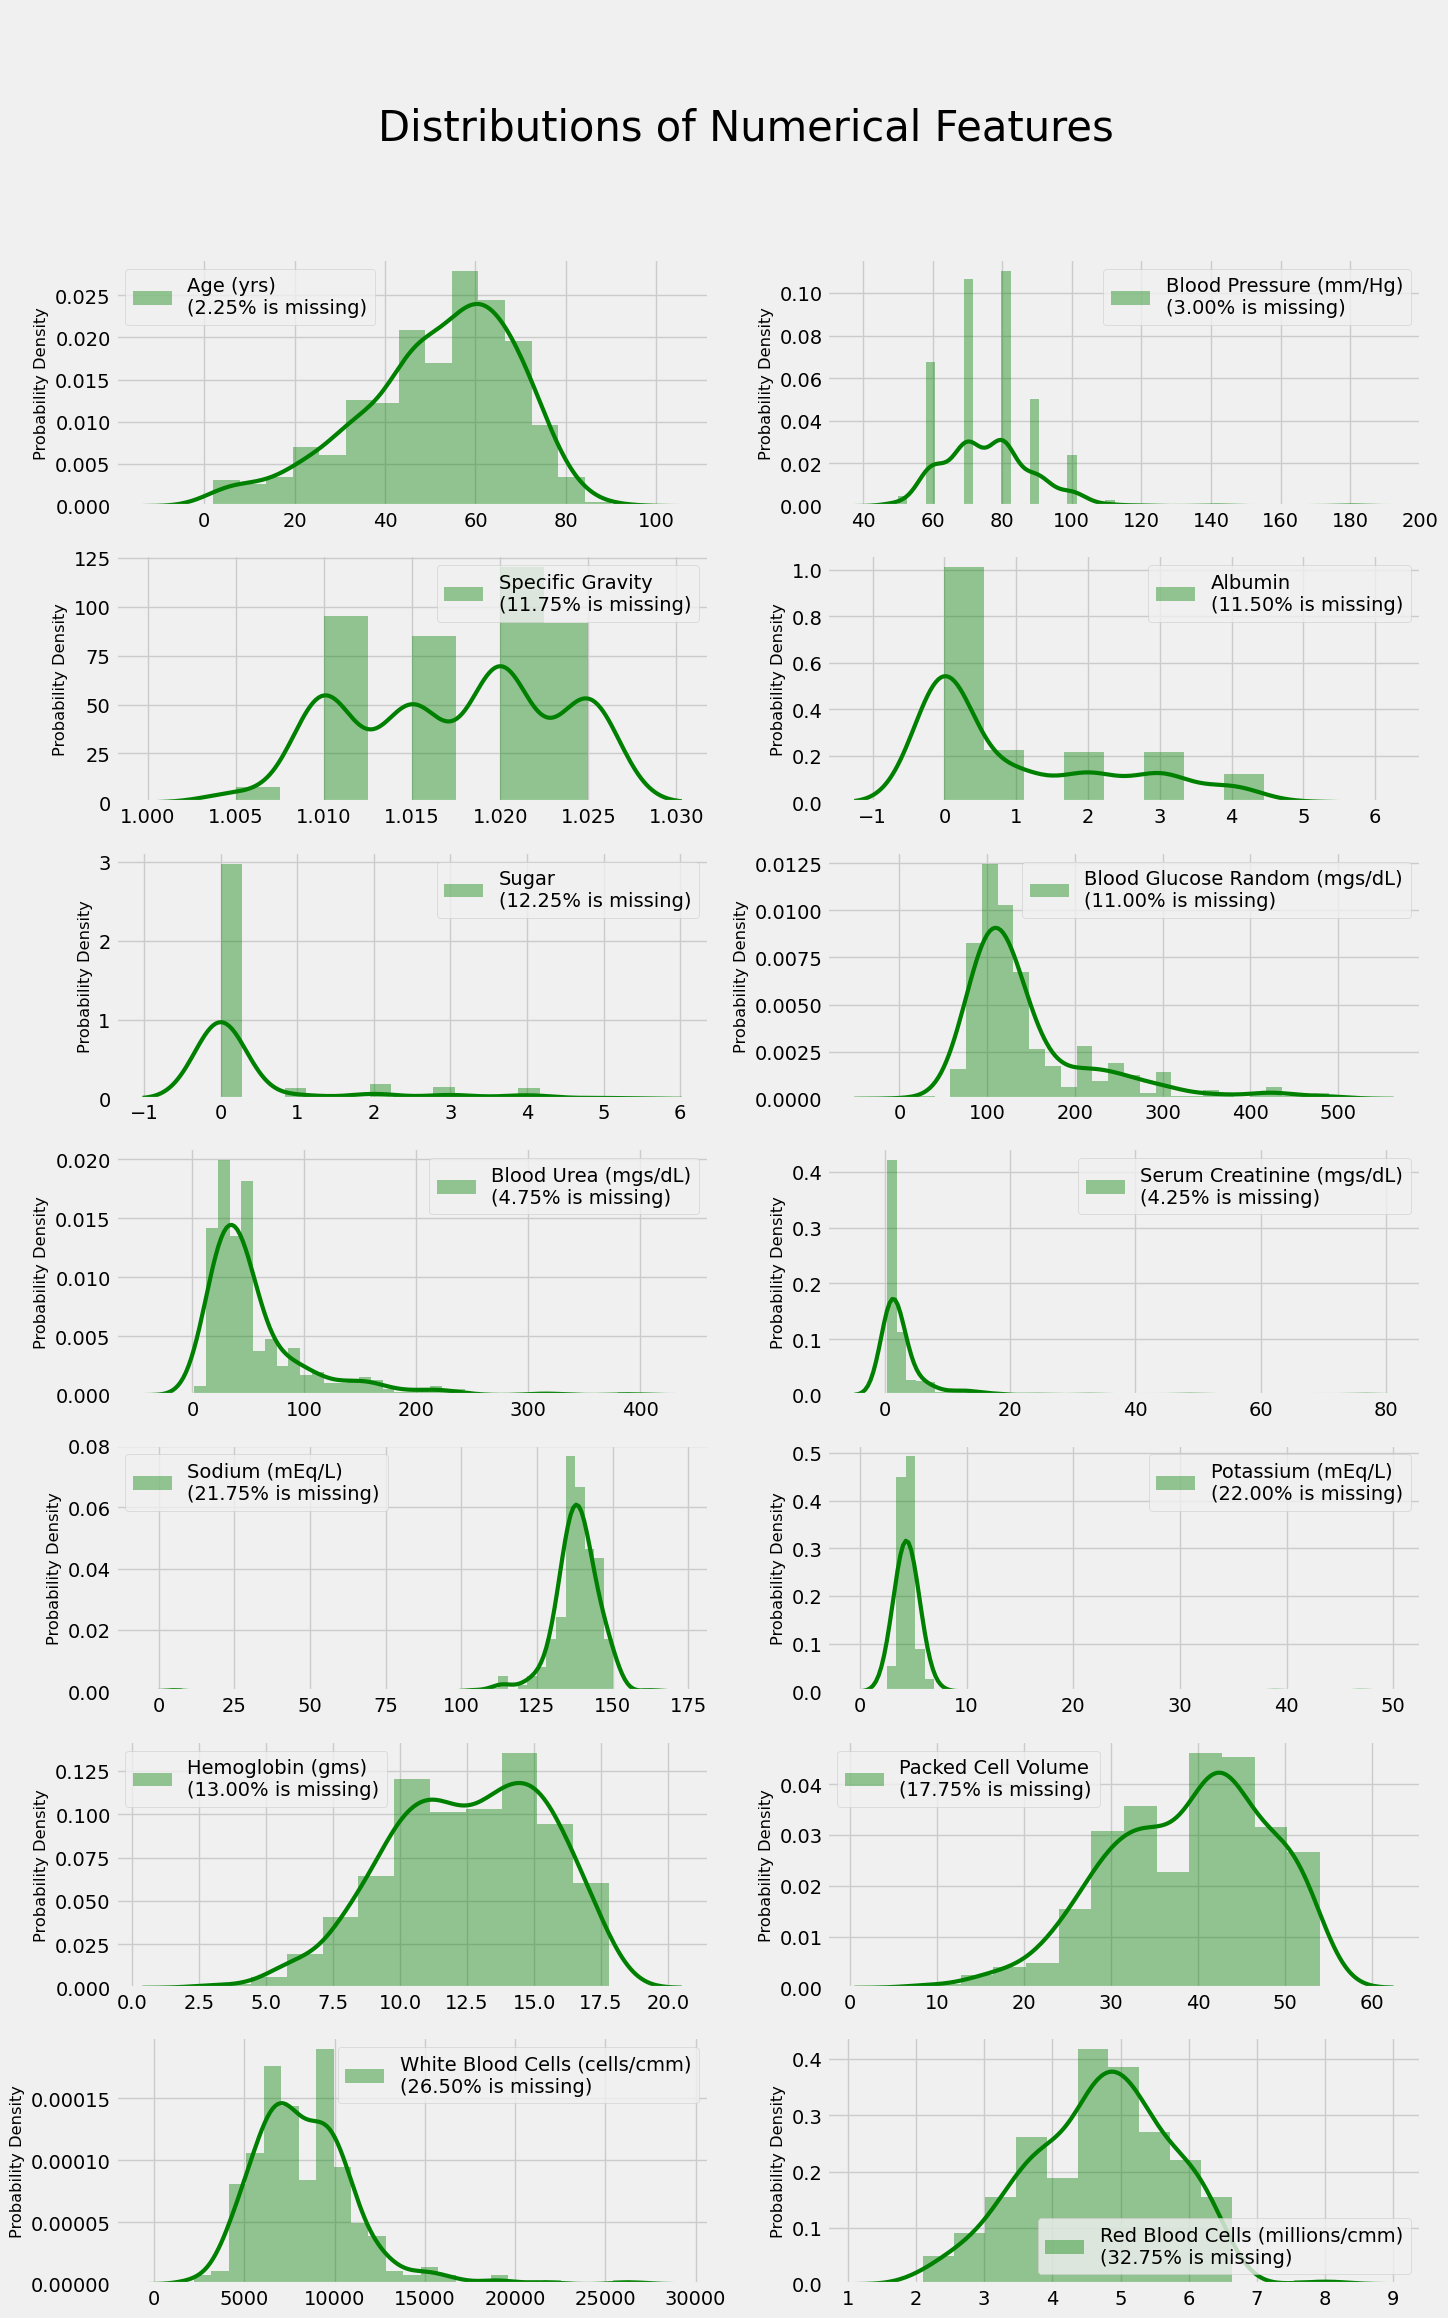

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

n_rows, n_cols = (7, 2)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 25))
fig.suptitle('\n\nDistributions of Numerical Features', fontsize=30)

for index, column in enumerate(numeric):
    i, j = divmod(index, n_cols)
    miss_perc = "%.2f" % (100 * (1 - (data[column].dropna().shape[0]) / data.shape[0]))
    collabel = f"{column}\n({miss_perc}% is missing)"
    sns.distplot(data[column], color="g", label=collabel, norm_hist=True, ax=axes[i, j], kde_kws={"lw": 3})
    axes[i, j].legend(loc='best', fontsize=14) 
    axes[i, j].set_ylabel("Probability Density", fontsize='small') 
    axes[i, j].set_xlabel(None)

plt.show()


Distributions of Categorical features

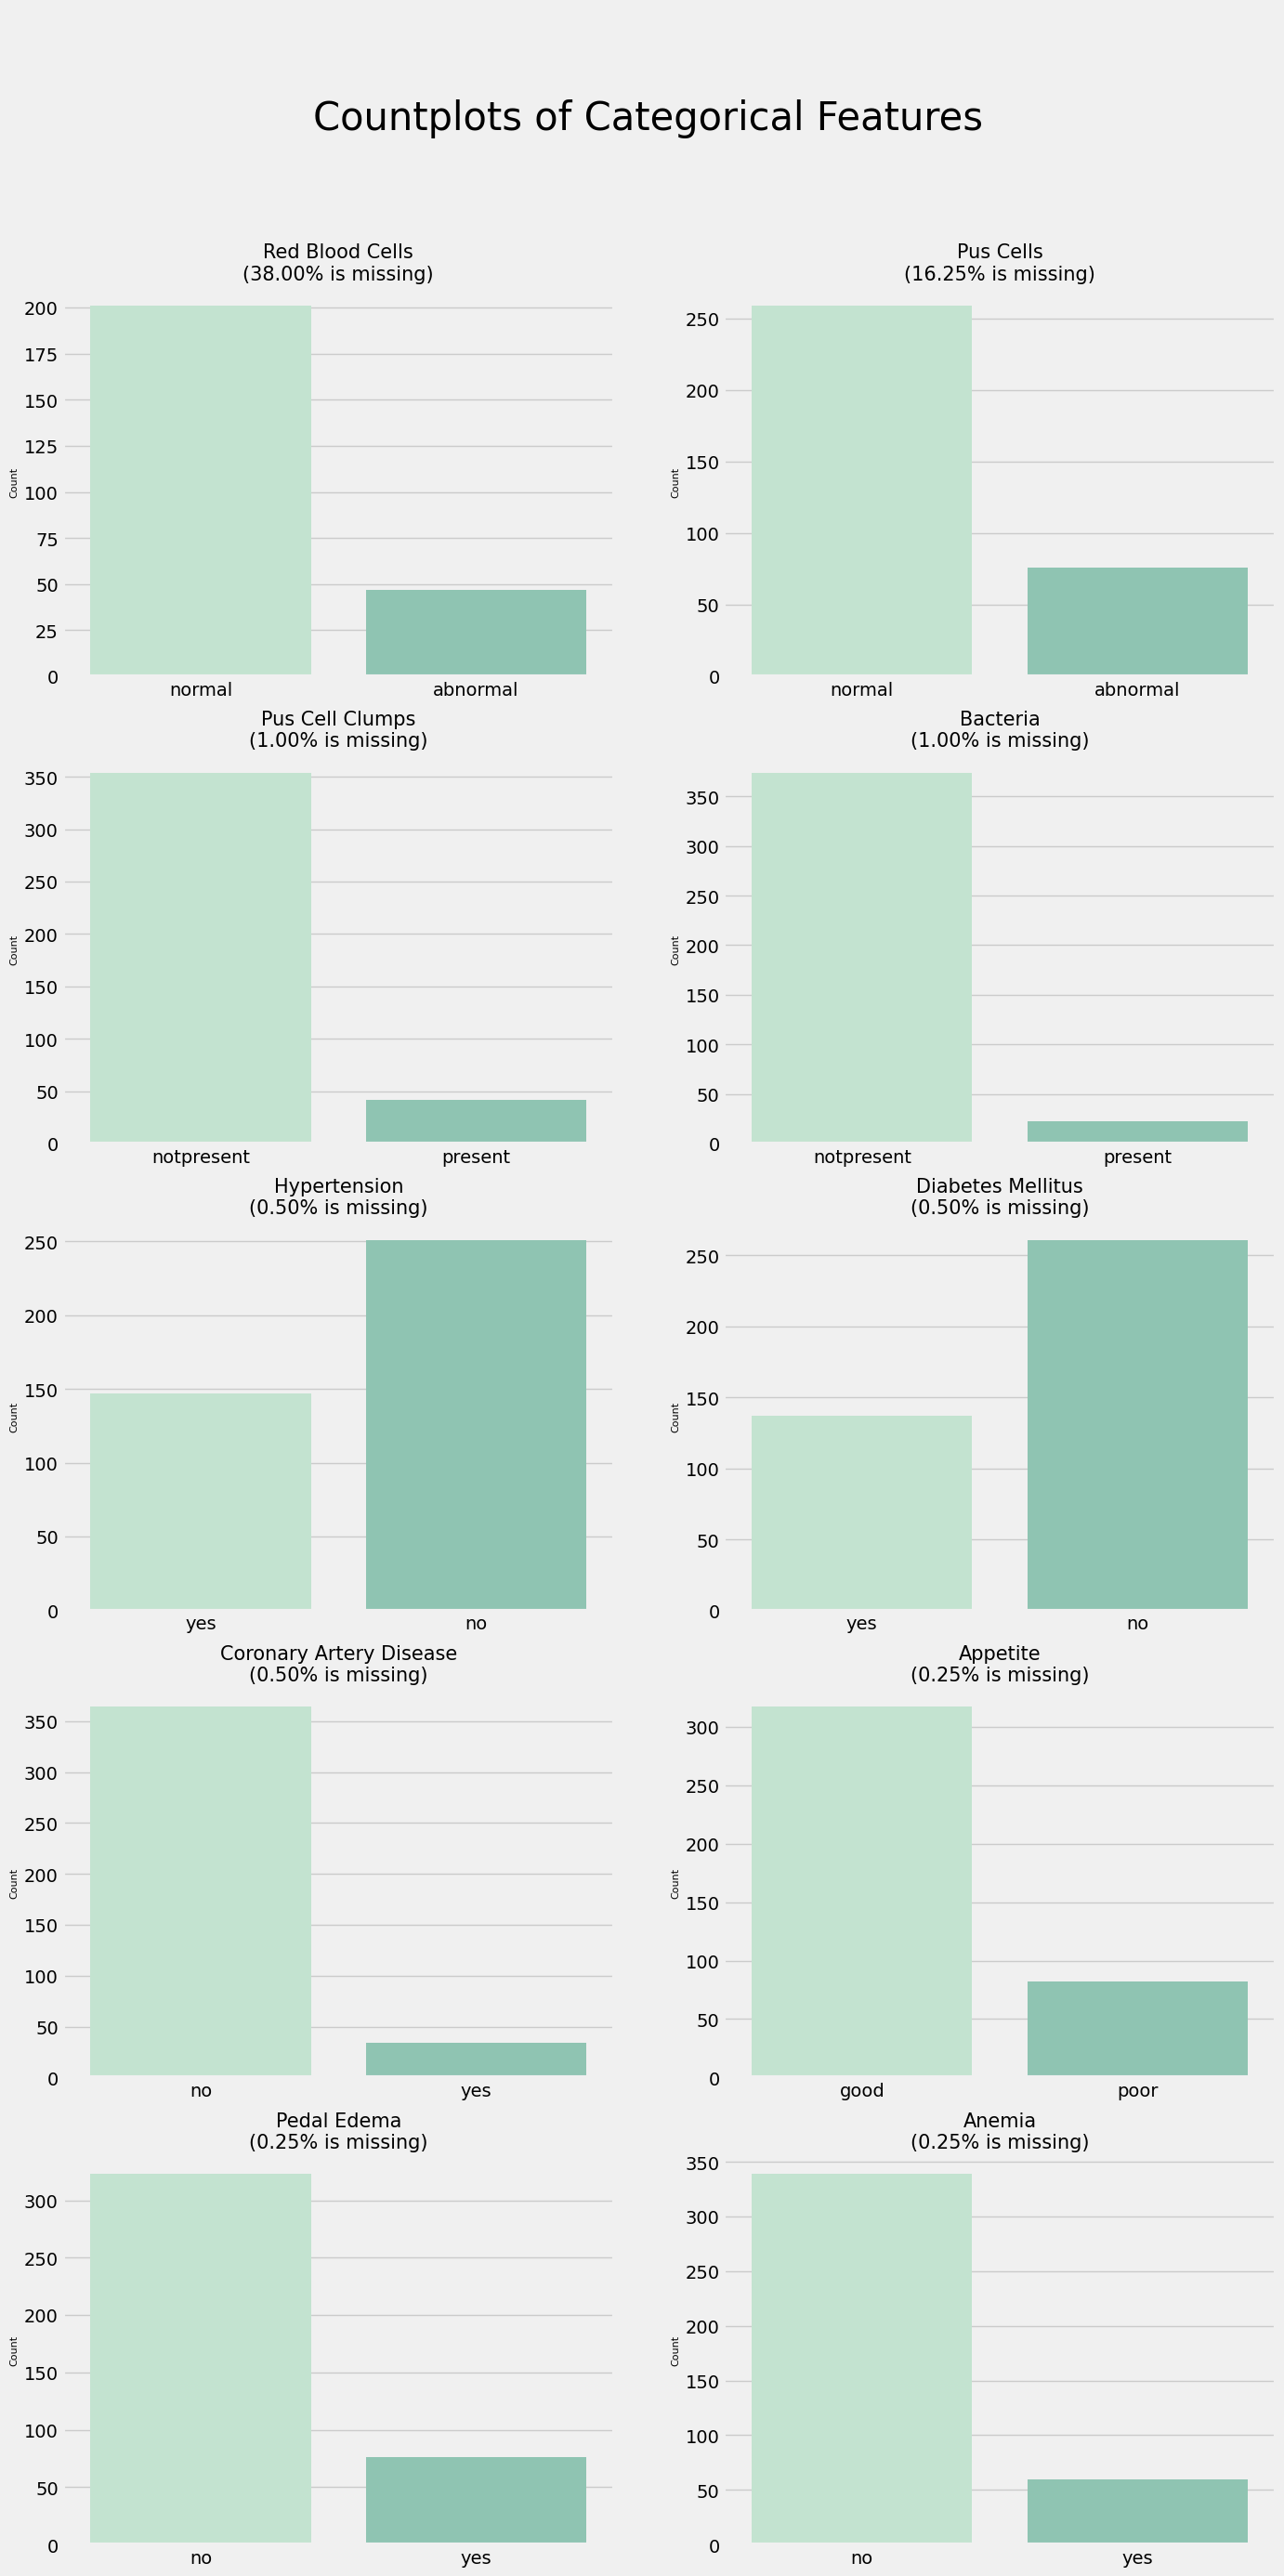

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

n_rows, n_cols = (5, 2)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 30))
fig.suptitle('\n\nCountplots of Categorical Features', fontsize=30)

for index, column in enumerate(categoricals):
    i, j = divmod(index, n_cols)
    miss_perc = "%.2f" % (100 * (1 - (data[column].dropna().shape[0]) / data.shape[0]))
    collabel = f"{column}\n({miss_perc}% is missing)"
    sns.countplot(x=column, data=data, label=collabel, palette=sns.cubehelix_palette(rot=-.35, light=0.85, hue=1), ax=axes[i, j])
    axes[i, j].set_title(collabel, fontsize=15)
    axes[i, j].set_xlabel(None)
    axes[i, j].set_ylabel("Count", fontsize=8)
    axes[i, j].tick_params(axis='x', labelsize=14)

plt.show()


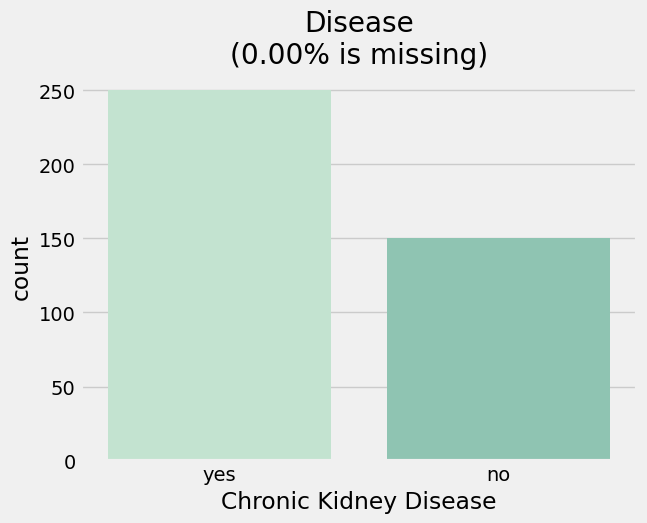

In [135]:
miss_perc="%.2f"%(100*(1-(data['Chronic Kidney Disease'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=data['Chronic Kidney Disease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()


In [136]:
data.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

  Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  \
0             NaN    normal      notpresent  notpresent   
1             NaN    normal      notpresent  notpresent   
2          normal    normal      notpresent  notpresent   
3          normal  abnormal         present  notpresent   
4          normal    normal      notpresent  notpresent   

   Blood Glucose Random (mgs/dL)  ...  Packed Cell Volume  \
0                          121.0  ...                44.0   
1                            NaN  ...                38.0   
2                          423.0  ...                31.0   
3                          117.0  ...                32.0   
4                          106.0  ...                35.0   

   White Blood Cells (cells/cmm)  Red Blood Cells (millions/cmm)  \
0                         7800.0                             5.2   
1                         6000.0                             NaN   
2                         7500.0                             NaN   
3                         6700.0                             3.9   
4                         7300.0                             4.6   

   Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   Pedal Edema Anemia Chronic Kidney Disease  
0           no     no                    yes  
1           no     no                    yes  
2           no    yes                    yes  
3          yes    yes                    yes  
4           no     no                    yes  

[5 rows x 25 columns]

# heatmap of data

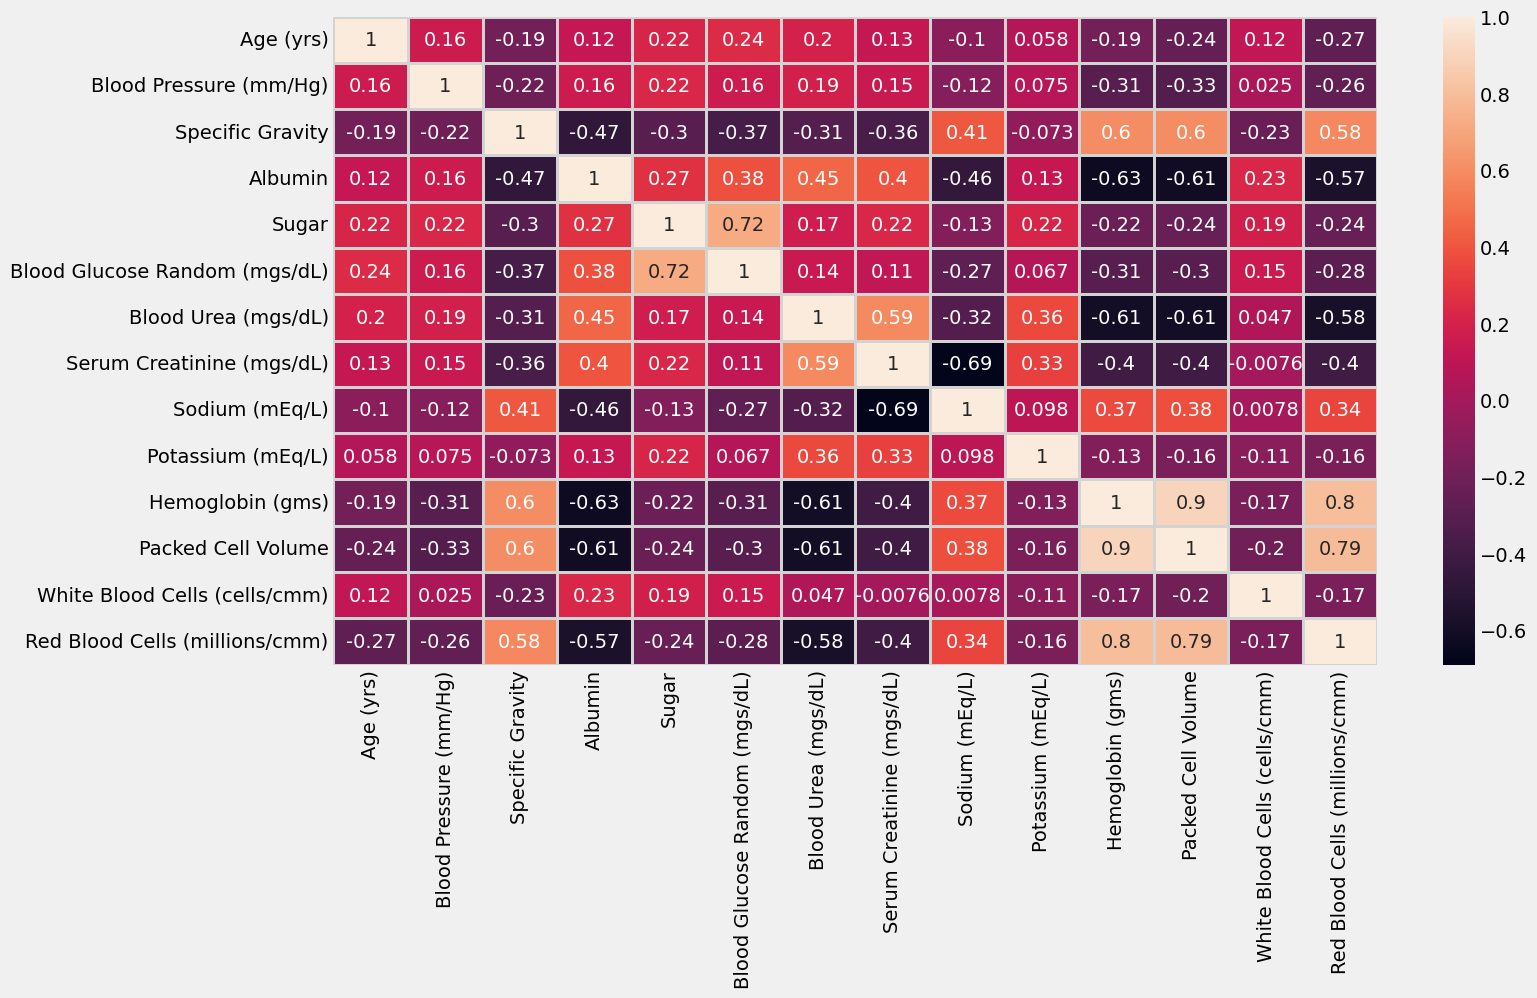

In [137]:
plt.figure(figsize = (15, 8))
sns.heatmap(data[numeric].corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

Categorical Features VS Target Variable 

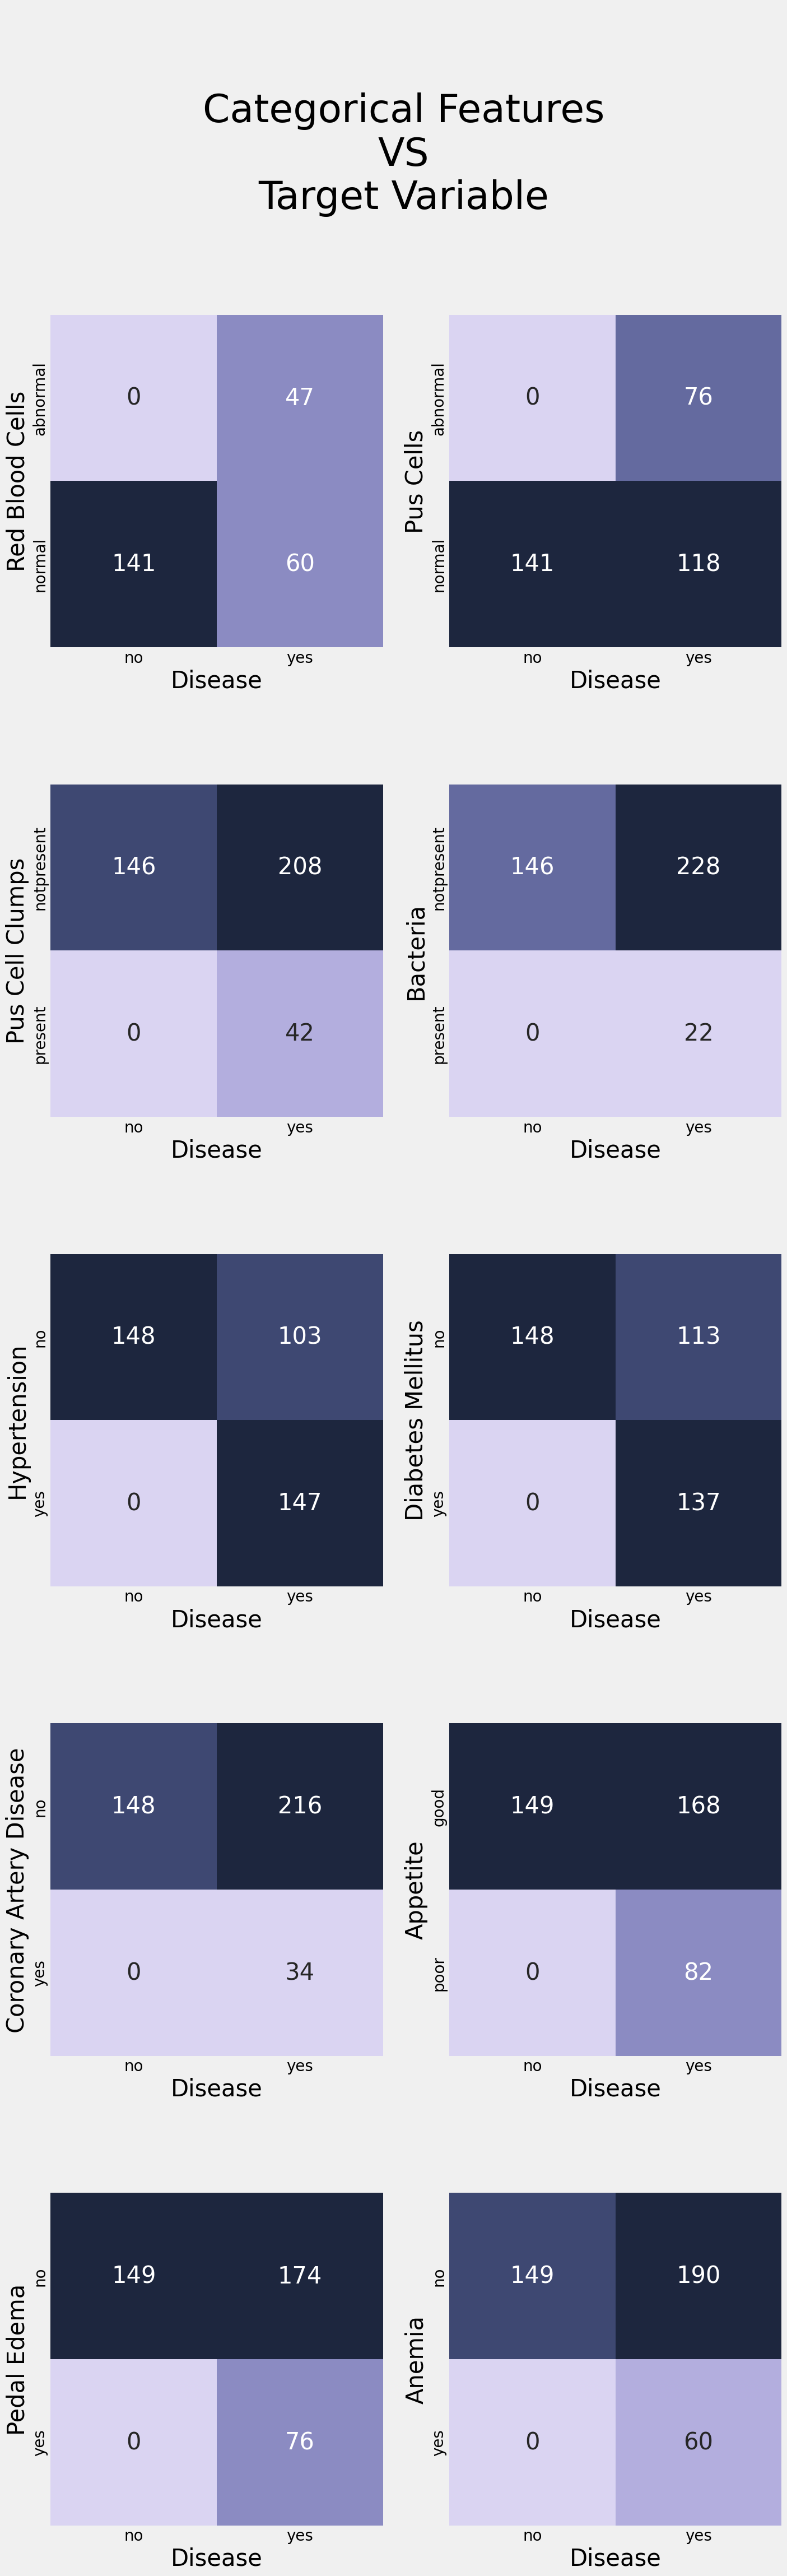

In [138]:
n_rows, n_cols = (5, 2)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 50))
fig.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=50)

for index, column in enumerate(categoricals):
    i, j = divmod(index, n_cols)
    sns.heatmap(pd.crosstab(data[column], data['Chronic Kidney Disease']),
                ax=axes[i, j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square=True,
                cbar=False,
                annot=True,
                annot_kws={'fontsize': 30},
                fmt='d')
    axes[i, j].set_xlabel("Disease", fontsize=30)
    axes[i, j].set_ylabel(column, fontsize=30)
    axes[i, j].tick_params(axis='both', labelsize=20)

plt.show()


Numerical Features VS Target Variable

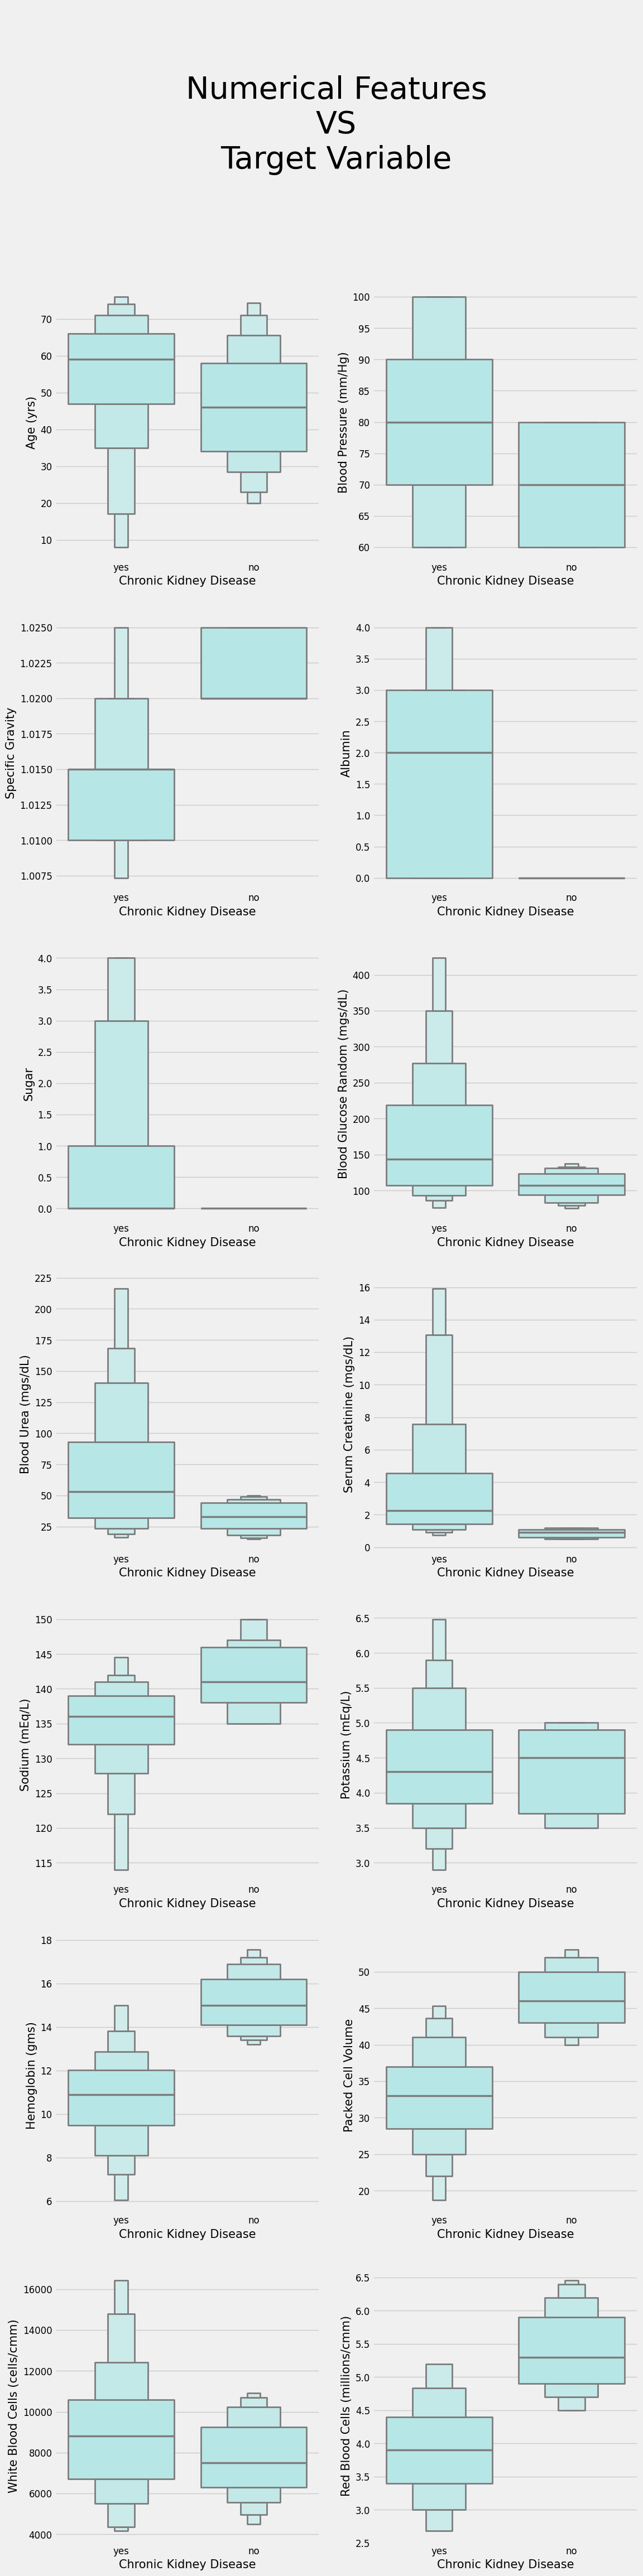

In [139]:
n_rows, n_cols = (7, 2)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 50))
fig.suptitle('\n\nNumerical Features\nVS\nTarget Variable', fontsize=40)

for index, column in enumerate(numeric):
    i, j = divmod(index, n_cols)
    bp = sns.boxenplot(y=column, x='Chronic Kidney Disease', data=data, color="paleturquoise", ax=axes[i, j], showfliers=False)
    axes[i, j].set_xlabel(axes[i, j].get_xlabel(), fontsize=15)
    axes[i, j].set_ylabel(column, fontsize=15)
    axes[i, j].tick_params(axis='both', labelsize=12)

plt.show()

Proportions of Missing Values

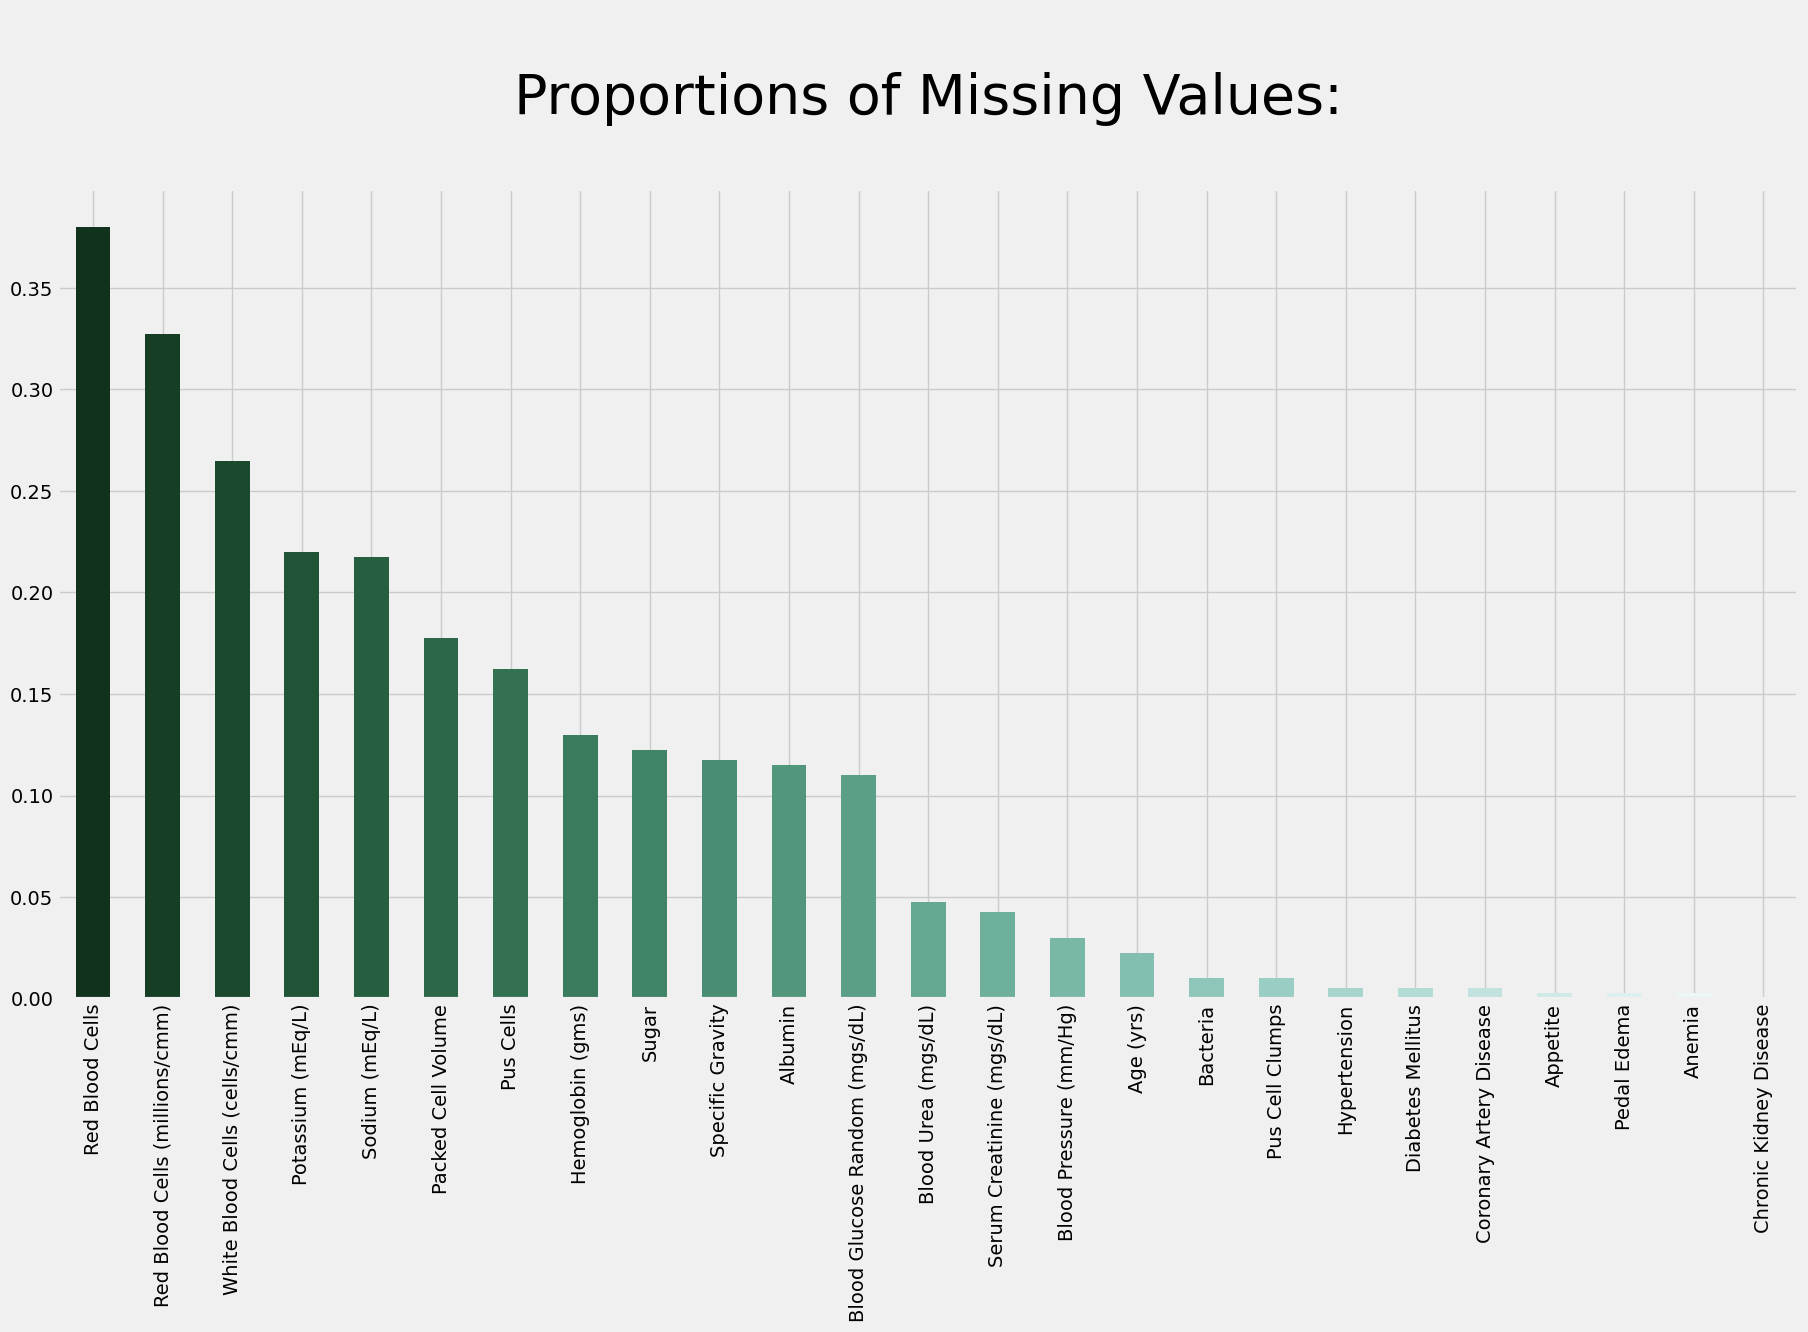

In [140]:
d = (data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

d.plot(kind='bar', color=sns.cubehelix_palette(start=2, rot=0.15, dark=0.15, light=0.95, reverse=True, n_colors=24), figsize=(20,10))
plt.title("\nProportions of Missing Values:\n", fontsize=40)
plt.show()


# PREPROCESSING

# MICE IMPUTATION


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [142]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=100, tol=1e-10, imputation_order='roman')

In [143]:
df1=imp.fit_transform(data[numeric])

[IterativeImputer] Completing matrix with shape (400, 14)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.01
[IterativeImputer] Change: 5417.3121061348465, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.02
[IterativeImputer] Change: 580.3954859491147, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.04
[IterativeImputer] Change: 332.6481399471672, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.05
[IterativeImputer] Change: 145.25752986083933, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.07
[IterativeImputer] Change: 85.50959213803033, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.09
[IterativeImputer] Change: 65.61858701850616, scaled tolerance: 2.64e-06 
[IterativeImputer] Ending imputation round 7/100, elapsed time 0.10
[IterativeImputer] C

In [144]:
dl1=pd.DataFrame(df1,columns=('Age (yrs)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)'))

In [145]:
dl1

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0         48.0                    80.0             1.020      1.0    0.0   
1          7.0                    50.0             1.020      4.0    0.0   
2         62.0                    80.0             1.010      2.0    3.0   
3         48.0                    70.0             1.005      4.0    0.0   
4         51.0                    80.0             1.010      2.0    0.0   
..         ...                     ...               ...      ...    ...   
395       55.0                    80.0             1.020      0.0    0.0   
396       42.0                    70.0             1.025      0.0    0.0   
397       12.0                    80.0             1.020      0.0    0.0   
398       17.0                    60.0             1.025      0.0    0.0   
399       58.0                    80.0             1.025      0.0    0.0   

     Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                       121.000000                 36.0   
1                       151.956336                 18.0   
2                       423.000000                 53.0   
3                       117.000000                 56.0   
4                       106.000000                 26.0   
..                             ...                  ...   
395                     140.000000                 49.0   
396                      75.000000                 31.0   
397                     100.000000                 26.0   
398                     114.000000                 50.0   
399                     131.000000                 18.0   

     Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  \
0                          1.2      138.831634           3.810517   
1                          0.8      130.755402           3.893913   
2                          1.8      132.772753           4.977609   
3                          3.8      111.000000           2.500000   
4                          1.4      133.685691           3.393739   
..                         ...             ...                ...   
395                        0.5      150.000000           4.900000   
396                        1.2      141.000000           3.500000   
397                        0.6      137.000000           4.400000   
398                        1.0      135.000000           4.900000   
399                        1.1      141.000000           3.500000   

     Hemoglobin (gms)  Packed Cell Volume  White Blood Cells (cells/cmm)  \
0                15.4                44.0                         7800.0   
1                11.3                38.0                         6000.0   
2                 9.6                31.0                         7500.0   
3                11.2                32.0                         6700.0   
4                11.6                35.0                         7300.0   
..                ...                 ...                            ...   
395              15.7                47.0                         6700.0   
396              16.5                54.0                         7800.0   
397              15.8                49.0                         6600.0   
398              14.2                51.0                         7200.0   
399              15.8                53.0                         6800.0   

     Red Blood Cells (millions/cmm)  
0                          5.200000  
1                          4.700884  
2                          3.747070  
3                          3.900000  
4                          4.600000  
..                              ...  
395                        4.900000  
396                        6.200000  
397                        5.400000  
398                        5.900000  
399                        6.100000  

[400 rows x 14 columns]

In [146]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='constant',fill_value='Missing')
df4=imputer.fit_transform(data[categoricals])

In [147]:
dl2=pd.DataFrame(df4,columns=('Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia'))

# Ordinal Encoding

In [148]:
from sklearn.preprocessing import OrdinalEncoder
ordi=OrdinalEncoder()
dl3=ordi.fit_transform(dl2)

In [149]:
dl4=pd.DataFrame(dl3,columns=(dl2.columns))

In [150]:
x=pd.concat([dl1,dl4],axis=1)

In [151]:
x

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0         48.0                    80.0             1.020      1.0    0.0   
1          7.0                    50.0             1.020      4.0    0.0   
2         62.0                    80.0             1.010      2.0    3.0   
3         48.0                    70.0             1.005      4.0    0.0   
4         51.0                    80.0             1.010      2.0    0.0   
..         ...                     ...               ...      ...    ...   
395       55.0                    80.0             1.020      0.0    0.0   
396       42.0                    70.0             1.025      0.0    0.0   
397       12.0                    80.0             1.020      0.0    0.0   
398       17.0                    60.0             1.025      0.0    0.0   
399       58.0                    80.0             1.025      0.0    0.0   

     Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                       121.000000                 36.0   
1                       151.956336                 18.0   
2                       423.000000                 53.0   
3                       117.000000                 56.0   
4                       106.000000                 26.0   
..                             ...                  ...   
395                     140.000000                 49.0   
396                      75.000000                 31.0   
397                     100.000000                 26.0   
398                     114.000000                 50.0   
399                     131.000000                 18.0   

     Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  ...  \
0                          1.2      138.831634           3.810517  ...   
1                          0.8      130.755402           3.893913  ...   
2                          1.8      132.772753           4.977609  ...   
3                          3.8      111.000000           2.500000  ...   
4                          1.4      133.685691           3.393739  ...   
..                         ...             ...                ...  ...   
395                        0.5      150.000000           4.900000  ...   
396                        1.2      141.000000           3.500000  ...   
397                        0.6      137.000000           4.400000  ...   
398                        1.0      135.000000           4.900000  ...   
399                        1.1      141.000000           3.500000  ...   

     Red Blood Cells  Pus Cells  Pus Cell Clumps  Bacteria  Hypertension  \
0                0.0        2.0              1.0       1.0           2.0   
1                0.0        2.0              1.0       1.0           1.0   
2                2.0        2.0              1.0       1.0           1.0   
3                2.0        1.0              2.0       1.0           2.0   
4                2.0        2.0              1.0       1.0           1.0   
..               ...        ...              ...       ...           ...   
395              2.0        2.0              1.0       1.0           1.0   
396              2.0        2.0              1.0       1.0           1.0   
397              2.0        2.0              1.0       1.0           1.0   
398              2.0        2.0              1.0       1.0           1.0   
399              2.0        2.0              1.0       1.0           1.0   

     Diabetes Mellitus  Coronary Artery Disease  Appetite  Pedal Edema  Anemia  
0                  2.0                      1.0       1.0          1.0     1.0  
1                  1.0                      1.0       1.0          1.0     1.0  
2                  2.0                      1.0       2.0          1.0     2.0  
3                  1.0                      1.0       2.0          2.0     2.0  
4                  1.0                      1.0       1.0          1.0     1.0  
..                 ...                      ...       ...          ...     ...  
395           

In [152]:
y=data['Chronic Kidney Disease']

In [153]:
a=pd.concat([x,y],axis=1)

In [154]:
Label={'notckd':0,'ckd':1}
a['Chronic Kidney Disease']=a['Chronic Kidney Disease'].replace({'yes': 1, 'no': 0}) 

# CKD - 2

In [155]:
from sklearn.preprocessing import OrdinalEncoder
ordi=OrdinalEncoder()
data_2_label=ordi.fit_transform(data_2)
data_2_label=pd.DataFrame(data_2_label,columns=(data_2.columns))
data_2_label

sg  bgr   sc  hemo  pcv  rbcc  rbc  htn   dm  Label  stage
0    3.0  0.0  3.0   1.0  5.0   4.0  0.0  0.0  0.0    0.0    0.0
1    1.0  1.0  3.0   1.0  5.0   4.0  0.0  0.0  0.0    0.0    0.0
2    1.0  0.0  3.0   8.0  4.0   4.0  1.0  0.0  0.0    0.0    0.0
3    1.0  1.0  3.0   3.0  7.0   4.0  0.0  0.0  0.0    0.0    0.0
4    2.0  2.0  3.0   3.0  6.0   5.0  0.0  0.0  1.0    0.0    0.0
..   ...  ...  ...   ...  ...   ...  ...  ...  ...    ...    ...
195  3.0  2.0  3.0   8.0  4.0   4.0  0.0  1.0  1.0    0.0    2.0
196  3.0  1.0  3.0   7.0  2.0   4.0  0.0  0.0  1.0    0.0    3.0
197  5.0  0.0  3.0   4.0  6.0   7.0  0.0  0.0  0.0    1.0    1.0
198  5.0  1.0  3.0   3.0  8.0   4.0  0.0  0.0  0.0    1.0    0.0
199  1.0  1.0  3.0   2.0  6.0   3.0  0.0  1.0  1.0    0.0    3.0

[200 rows x 11 columns]

# Scaling Features using Standard Scaler 

In [156]:

from sklearn.preprocessing import StandardScaler
target_class = a['Chronic Kidney Disease']
features = a.drop('Chronic Kidney Disease', axis = 1)
data = pd.DataFrame(StandardScaler().fit_transform(features), columns=features.columns)

In [157]:
X = data
y = target_class

In [158]:
X

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity   Albumin     Sugar  \
0    -0.207774                0.263191          0.502114 -0.074192 -0.427825   
1    -2.623570               -1.962816          0.502114  2.142559 -0.427825   
2     0.617132                0.263191         -1.154995  0.664725  2.287493   
3    -0.207774               -0.478811         -1.983549  2.142559 -0.427825   
4    -0.031009                0.263191         -1.154995  0.664725 -0.427825   
..         ...                     ...               ...       ...       ...   
395   0.204679                0.263191          0.502114 -0.813110 -0.427825   
396  -0.561305               -0.478811          1.330669 -0.813110 -0.427825   
397  -2.328960                0.263191          0.502114 -0.813110 -0.427825   
398  -2.034351               -1.220814          1.330669 -0.813110 -0.427825   
399   0.381444                0.263191          1.330669 -0.813110 -0.427825   

     Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                        -0.367455            -0.429318   
1                         0.034289            -0.792442   
2                         3.551838            -0.086367   
3                        -0.419367            -0.025847   
4                        -0.562122            -0.631053   
..                             ...                  ...   
395                      -0.120877            -0.167062   
396                      -0.964434            -0.530186   
397                      -0.639989            -0.631053   
398                      -0.458300            -0.146888   
399                      -0.237678            -0.792442   

     Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  ...  \
0                    -0.329043        0.169338          -0.232345  ...   
1                    -0.399884       -0.635593          -0.204047  ...   
2                    -0.222782       -0.434530           0.163685  ...   
3                     0.131422       -2.604547          -0.677044  ...   
4                    -0.293623       -0.343541          -0.373771  ...   
..                         ...             ...                ...  ...   
395                  -0.453015        1.282451           0.137350  ...   
396                  -0.329043        0.385452          -0.337713  ...   
397                  -0.435305       -0.013215          -0.032316  ...   
398                  -0.364464       -0.212548           0.137350  ...   
399                  -0.346754        0.385452          -0.337713  ...   

     Red Blood Cells  Pus Cells  Pus Cell Clumps  Bacteria  Hypertension  \
0          -1.205183   0.679295        -0.291825  -0.17932      1.298336   
1          -1.205183   0.679295        -0.291825  -0.17932     -0.738270   
2           0.942137   0.679295        -0.291825  -0.17932     -0.738270   
3           0.942137  -0.639724         2.780013  -0.17932      1.298336   
4           0.942137   0.679295        -0.291825  -0.17932     -0.738270   
..               ...        ...              ...       ...           ...   
395         0.942137   0.679295        -0.291825  -0.17932     -0.738270   
396         0.942137   0.679295        -0.291825  -0.17932     -0.738270   
397         0.942137   0.679295        -0.291825  -0.17932     -0.738270   
398         0.942137   0.679295        -0.291825  -0.17932     -0.738270   
399         0.942137   0.679295        -0.291825  -0.17932     -0.738270   

     Diabetes Mellitus  Coronary Artery Disease  Appetite  Pedal Edema  \
0             1.370741                -0.276686 -0.496279    -0.472690   
1            -0.698302                -0.276686 -0.496279    -0.472690   
2             1.370741                -0.276686  1.954482    -0.472690   
3            -0.698302                -0.276686  1.954482     2.048324   
4            -0.698302                -0.276686 -0.496279    -0.472690   
..                 ...                      ...       ...          ...   
395          -0

# CKD - 2

In [159]:
from sklearn.preprocessing import StandardScaler
features2 = data_2_label.drop('Label', axis=1)
data = pd.DataFrame(StandardScaler().fit_transform(features2), columns=features2.columns)

In [160]:
y_2 = data_2_label['Label']
X_2 = data

# Feature Selection

# Recursive Feature Elimination

In [161]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
sel=RFE(RandomForestClassifier())

In [162]:
sel.fit(X, y)

RFE(estimator=RandomForestClassifier())

In [163]:
sel.get_support()

array([False, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False, False,
        True,  True, False,  True, False, False])

In [164]:
features=X.columns[sel.get_support()]
features

Index(['Specific Gravity', 'Albumin', 'Blood Glucose Random (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Hemoglobin (gms)',
       'Packed Cell Volume', 'Red Blood Cells (millions/cmm)',
       'Red Blood Cells', 'Hypertension', 'Diabetes Mellitus', 'Appetite'],
      dtype='object')

In [165]:
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, sel.support_[i], sel.ranking_[i]))

Column: 0, Selected False, Rank: 6.000
Column: 1, Selected False, Rank: 7.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 5.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 10.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 4.000
Column: 16, Selected False, Rank: 11.000
Column: 17, Selected False, Rank: 12.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 13.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 8.000
Column: 23, Selected False, Rank: 9.000


In [166]:
sel.n_features_

12

In [167]:
best_feature1=sel.transform(X)
best_feature1

array([[ 0.50211425, -0.07419243, -0.36745548, ...,  1.29833634,
         1.37074059, -0.49627918],
       [ 0.50211425,  2.14255908,  0.03428942, ..., -0.73826968,
        -0.69830181, -0.49627918],
       [-1.1549947 ,  0.66472474,  3.5518378 , ..., -0.73826968,
         1.37074059,  1.95448222],
       ...,
       [ 0.50211425, -0.8131096 , -0.63998912, ..., -0.73826968,
        -0.69830181, -0.49627918],
       [ 1.33066873, -0.8131096 , -0.45830003, ..., -0.73826968,
        -0.69830181, -0.49627918],
       [ 1.33066873, -0.8131096 , -0.23767756, ..., -0.73826968,
        -0.69830181, -0.49627918]])

# Boruta

In [168]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
feat_selector=BorutaPy(rf,n_estimators=200,verbose=2, random_state=None)

In [169]:
u_shadow=X.apply(np.random.permutation)
u_shadow.columns=['shadow_'+feat for feat in X.columns]
u_boruta=pd.concat([X,u_shadow],axis=1)

In [170]:
u_boruta

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity   Albumin     Sugar  \
0    -0.207774                0.263191          0.502114 -0.074192 -0.427825   
1    -2.623570               -1.962816          0.502114  2.142559 -0.427825   
2     0.617132                0.263191         -1.154995  0.664725  2.287493   
3    -0.207774               -0.478811         -1.983549  2.142559 -0.427825   
4    -0.031009                0.263191         -1.154995  0.664725 -0.427825   
..         ...                     ...               ...       ...       ...   
395   0.204679                0.263191          0.502114 -0.813110 -0.427825   
396  -0.561305               -0.478811          1.330669 -0.813110 -0.427825   
397  -2.328960                0.263191          0.502114 -0.813110 -0.427825   
398  -2.034351               -1.220814          1.330669 -0.813110 -0.427825   
399   0.381444                0.263191          1.330669 -0.813110 -0.427825   

     Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                        -0.367455            -0.429318   
1                         0.034289            -0.792442   
2                         3.551838            -0.086367   
3                        -0.419367            -0.025847   
4                        -0.562122            -0.631053   
..                             ...                  ...   
395                      -0.120877            -0.167062   
396                      -0.964434            -0.530186   
397                      -0.639989            -0.631053   
398                      -0.458300            -0.146888   
399                      -0.237678            -0.792442   

     Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  ...  \
0                    -0.329043        0.169338          -0.232345  ...   
1                    -0.399884       -0.635593          -0.204047  ...   
2                    -0.222782       -0.434530           0.163685  ...   
3                     0.131422       -2.604547          -0.677044  ...   
4                    -0.293623       -0.343541          -0.373771  ...   
..                         ...             ...                ...  ...   
395                  -0.453015        1.282451           0.137350  ...   
396                  -0.329043        0.385452          -0.337713  ...   
397                  -0.435305       -0.013215          -0.032316  ...   
398                  -0.364464       -0.212548           0.137350  ...   
399                  -0.346754        0.385452          -0.337713  ...   

     shadow_Red Blood Cells  shadow_Pus Cells  shadow_Pus Cell Clumps  \
0                 -1.205183          0.679295                2.780013   
1                  0.942137         -0.639724               -0.291825   
2                  0.942137         -1.958743               -0.291825   
3                 -1.205183         -1.958743               -0.291825   
4                  0.942137         -0.639724               -0.291825   
..                      ...               ...                     ...   
395               -1.205183         -0.639724               -0.291825   
396               -1.205183          0.679295               -0.291825   
397               -1.205183         -1.958743                2.780013   
398               -1.205183         -0.639724                2.780013   
399                0.942137          0.679295               -0.291825   

     shadow_Bacteria  shadow_Hypertension  shadow_Diabetes Mellitus  \
0           -0.17932            -0.738270                 -0.698302   
1           -0.17932             1.298336                  1.370741   
2           -0.17932            -0.738270                  1.370741   
3           -0.17932             1.298336                 -0.698302   
4           -0.17932            -0.738270                 -0.698302   
..               ...                  ...                       ...   
395         -0.17932             1.298336                 -0.698302   
3

In [171]:
rf.fit(u_boruta,y)

RandomForestClassifier()

In [172]:
feature_imp_u=rf.feature_importances_[:len(X.columns)]
feature_imp_shadow=rf.feature_importances_[len(X.columns):]
hits=feature_imp_u>feature_imp_shadow.max()

In [173]:
feature_imp_u

array([0.00709822, 0.0106462 , 0.14151498, 0.10748814, 0.00921088,
       0.0344444 , 0.03236658, 0.09510131, 0.01891805, 0.00988438,
       0.13410664, 0.10950147, 0.00267998, 0.0587356 , 0.09666363,
       0.01548028, 0.001239  , 0.0010494 , 0.0380315 , 0.02458945,
       0.00172525, 0.00765905, 0.00953914, 0.00233111])

In [174]:
feature_imp_shadow.max()

0.005101920523306805

In [175]:
hits

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True,  True, False])

In [176]:
feature_names = np.array(X.columns)

# Balancing Data using Borderline SMOTE

In [177]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
import numpy as np
smote=SMOTE()
sm = SVMSMOTE()
np.random.seed(42)
X, y =sm.fit_resample(X,y)
X.shape

(459, 24)

In [178]:
y.value_counts()

Chronic Kidney Disease
1    250
0    209
Name: count, dtype: int64

In [179]:
X_RFE = X[['Age (yrs)', 'Specific Gravity', 'Albumin',
       'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Hemoglobin (gms)',
       'Packed Cell Volume', 'Red Blood Cells (millions/cmm)', 'Hypertension',
       'Diabetes Mellitus']]

In [180]:
X_boruta = X[['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Red Blood Cells', 'Bacteria',
       'Hypertension', 'Diabetes Mellitus',
       'Appetite', 'Pedal Edema']]

# Splitting

# with RFE

In [181]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_RFE, y, test_size=0.2, random_state=42)

# with Boruta

In [182]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X_boruta, y, test_size=0.2, random_state=42)

# with All Features

In [183]:
x_train2,x_test2,y_train2,y_test2=train_test_split(X, y, test_size=0.2, random_state=42)

# with CKD - 2

In [184]:
x_train3,x_test3,y_train3,y_test3=train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Model

In [185]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

with RFE

In [186]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize RandomForestClassifier with specified parameters
rf = RandomForestClassifier(n_estimators=80, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            max_depth=None, 
                            bootstrap=False)

# Perform cross-validation
cv_scores = cross_val_score(rf, x_train, y_train, cv=5)
print("Mean CV Score:", cv_scores.mean())

y_pred_cv = cross_val_predict(rf, x_test, y_test, cv=20)

accuracy = accuracy_score(y_test, y_pred_cv)

print("\nAccuracy:")
print(accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_cv)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cv))

'''sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()'''

Mean CV Score: 0.9918548685671974



Accuracy:
0.9782608695652174

Confusion Matrix:
[[41  1]
 [ 1 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.98      0.98        50

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



"sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')\nplt.xlabel('Predicted')\nplt.ylabel('Actual')\nplt.title('Confusion Matrix')\nplt.show()"

Mean CV Score: 0.991891891891892

AUC-ROC Score: 1.0


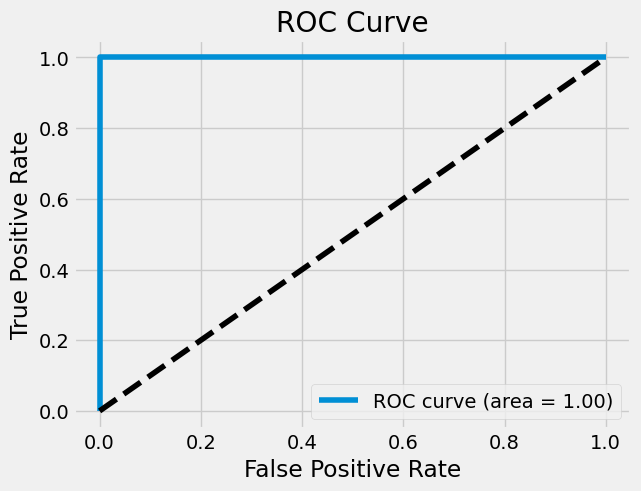


Accuracy: 0.9782608695652174

Confusion Matrix:
[[41  1]
 [ 1 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.98      0.98        50

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



In [187]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize RandomForestClassifier with specified parameters
rf = RandomForestClassifier(n_estimators=80, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            max_depth=None, 
                            bootstrap=False)

# Perform cross-validation
cv_scores = cross_val_score(rf, x_train, y_train, cv=5)
print("Mean CV Score:", cv_scores.mean())

# Generate class probabilities using cross-validation
y_prob_cv = cross_val_predict(rf, x_test, y_test, cv=20, method='predict_proba')
# Considering the positive class probability for ROC curve
y_prob_cv_positive = y_prob_cv[:, 1]

# Compute AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob_cv_positive)
print("\nAUC-ROC Score:", auc_roc)

# Plot AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_cv_positive)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv)
print("\nAccuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_cv)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cv))

with boruta

Mean CV Score: 0.9945945945945945

Accuracy:
0.9782608695652174

Confusion Matrix:
[[42  0]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.96      0.98        50

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



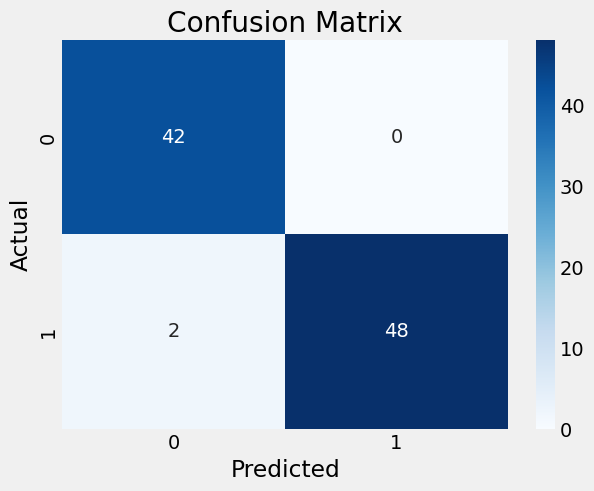

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=500,
                            min_samples_split=5,
                            min_samples_leaf=3,
                            max_depth=None,
                            bootstrap=False)

cv_scores = cross_val_score(rf, x_train1, y_train1, cv=5)
print("Mean CV Score:", cv_scores.mean())

y_pred_cv = cross_val_predict(rf, x_test1, y_test1, cv=10)

accuracy = accuracy_score(y_test1, y_pred_cv)

print("\nAccuracy:")
print(accuracy)

conf_matrix = confusion_matrix(y_test1, y_pred_cv)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test1, y_pred_cv))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

with all features

Mean CV Score: 0.9891151425398

Accuracy:
0.9782608695652174

Confusion Matrix:
[[42  0]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.96      0.98        50

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



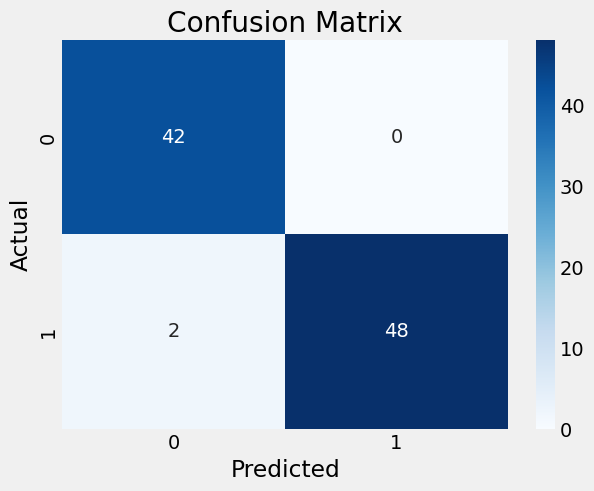

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Define RandomForestClassifier with specified parameters
rf = RandomForestClassifier(n_estimators = 500, min_samples_split=3, min_samples_leaf=4, max_features='sqrt', max_depth=None)

# Perform cross-validation
cv_scores = cross_val_score(rf, x_train2, y_train2, cv=5)
print("Mean CV Score:", cv_scores.mean())

# Predict with cross-validation
y_pred_cv = cross_val_predict(rf, x_test2, y_test2, cv=5)

accuracy = accuracy_score(y_test2, y_pred_cv)

print("\nAccuracy:")
print(accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test2, y_pred_cv)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_cv))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

with ckd 2

Mean CV Score: 0.9875

Accuracy:
0.975

Confusion Matrix:
[[25  0]
 [ 1 14]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        25
         1.0       1.00      0.93      0.97        15

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



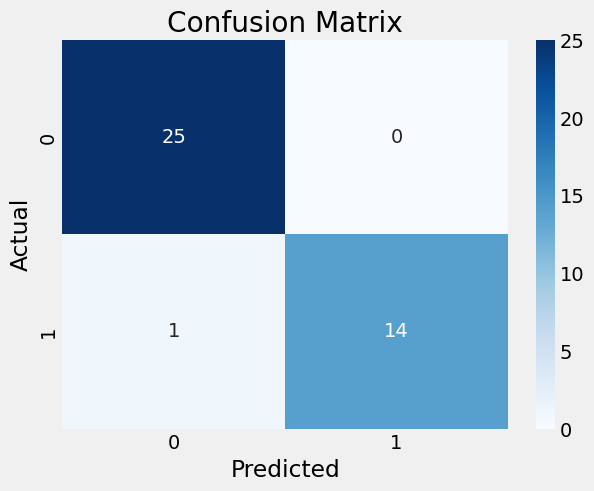

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Define RandomForestClassifier with specified parameters
rf = RandomForestClassifier(n_estimators = 50,
  min_samples_split =  2,
  min_samples_leaf = 1,
  max_depth = None,
  bootstrap = True)

# Perform cross-validation
cv_scores = cross_val_score(rf, x_train3, y_train3, cv=5)
print("Mean CV Score:", cv_scores.mean())



# Predict with cross-validation
y_pred_cv = cross_val_predict(rf, x_test3, y_test3, cv=8)

accuracy = accuracy_score(y_test3, y_pred_cv)

print("\nAccuracy:")
print(accuracy)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test3, y_pred_cv)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_cv))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy:
0.967391304347826

Confusion Matrix:
[[40  2]
 [ 1 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.96      0.98      0.97        50

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92



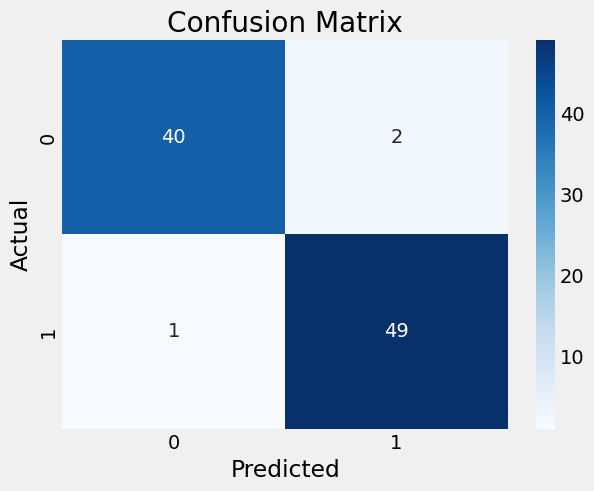

In [191]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Define AdaBoostClassifier with specified parameters
model = AdaBoostClassifier(   
                               n_estimators=2000,
                               learning_rate=0.01,
                               algorithm='SAMME.R',
                               random_state=42)

model.fit(x_train,y_train)

# Predict with cross-validation
y_pred_cv = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_cv)

print("\nAccuracy:")
print(accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_cv)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cv))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Cross-Validation Scores: [1.         0.97297297 0.97260274 1.         0.98630137]
Mean CV Score: 0.9863754165124028

Accuracy:
0.9565217391304348

Confusion Matrix:
[[39  3]
 [ 1 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.94      0.98      0.96        50

    accuracy                           0.96        92
   macro avg       0.96      0.95      0.96        92
weighted avg       0.96      0.96      0.96        92



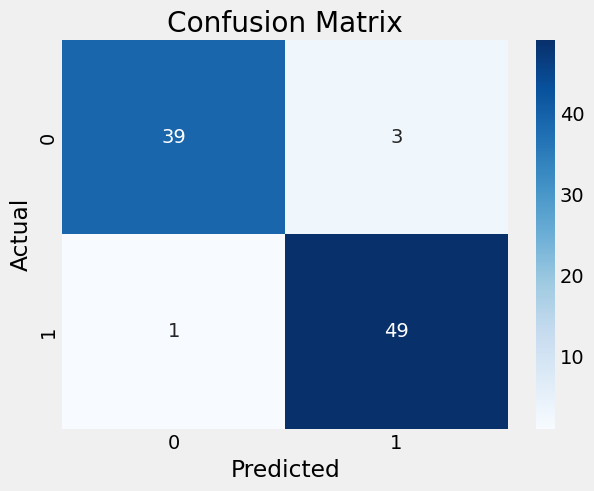

In [192]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Define AdaBoostClassifier with specified parameters
ada_boost = AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

# Perform cross-validation
cv_scores = cross_val_score(ada_boost, x_train1, y_train1, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict with cross-validation
y_pred_cv = cross_val_predict(ada_boost, x_test1, y_test1, cv=20)

accuracy = accuracy_score(y_test1, y_pred_cv)

print("\nAccuracy:")
print(accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test1, y_pred_cv)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test1, y_pred_cv))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Cross-Validation Scores: [1.         0.97297297 0.97260274 1.         0.97260274]
Mean CV Score: 0.9836356904850057

Accuracy:
0.9347826086956522

Confusion Matrix:
[[39  3]
 [ 3 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.94      0.94      0.94        50

    accuracy                           0.93        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.93      0.93        92



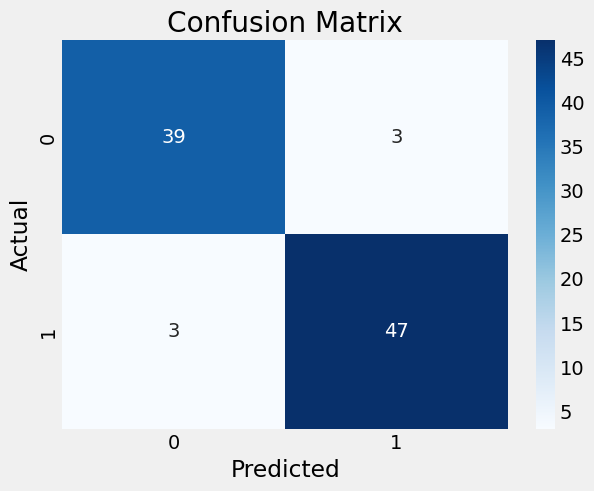

In [193]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Define AdaBoostClassifier with specified parameters
ada_boost = AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

# Perform cross-validation
cv_scores = cross_val_score(ada_boost, x_train2, y_train2, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict with cross-validation
y_pred_cv = cross_val_predict(ada_boost, x_test2, y_test2, cv=10)

accuracy = accuracy_score(y_test2, y_pred_cv)

print("\nAccuracy:")
print(accuracy)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test2, y_pred_cv)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_cv))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Cross-Validation Scores: [0.9375  0.96875 0.90625 0.9375  0.96875]
Mean CV Score: 0.94375

Accuracy:
0.95

Confusion Matrix:
[[23  2]
 [ 0 15]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        25
         1.0       0.88      1.00      0.94        15

    accuracy                           0.95        40
   macro avg       0.94      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40



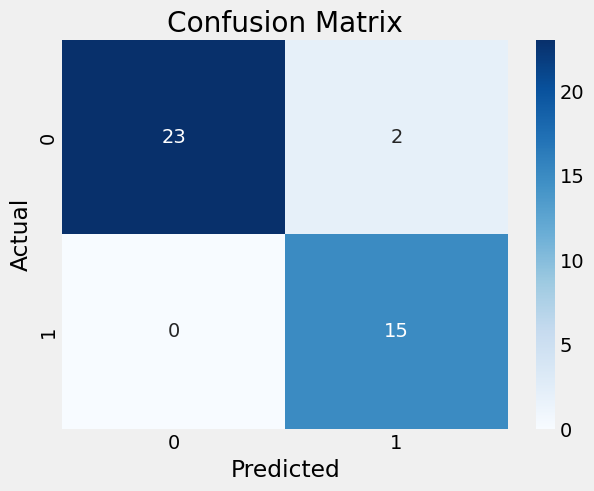

In [194]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Define AdaBoostClassifier with specified parameters
ada_boost = AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

# Perform cross-validation
cv_scores = cross_val_score(ada_boost, x_train3, y_train3, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict with cross-validation
y_pred_cv = cross_val_predict(ada_boost, x_test3, y_test3, cv=6)

accuracy = accuracy_score(y_test3, y_pred_cv)

print("\nAccuracy:")
print(accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test3, y_pred_cv)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_cv))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 200, number of negative: 167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 367, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544959 -> initscore=0.180324
[LightGBM] [Info] Start training from score 0.180324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

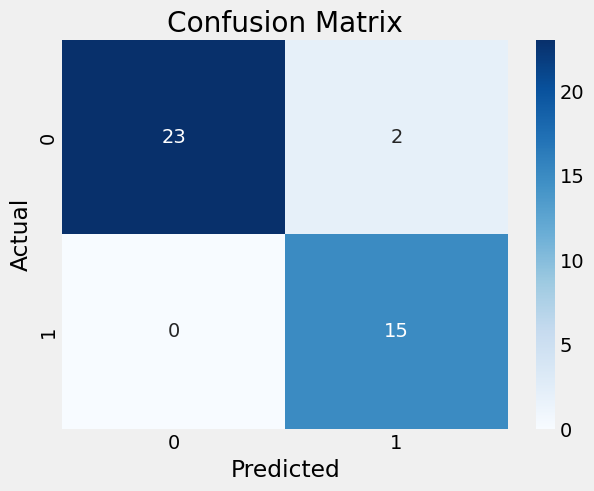

In [195]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
gdc = lgb.fit(x_train,y_train)

# Predictions:
y_pred12 = gdc.predict(x_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred12))
print(confusion_matrix(y_test,y_pred12))

x = accuracy_score(y_test, y_pred12)
print(x)

print("\nClassification Report:")
print(classification_report(y_test, y_pred12))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 200, number of negative: 167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 367, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544959 -> initscore=0.180324
[LightGBM] [Info] Start training from score 0.180324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

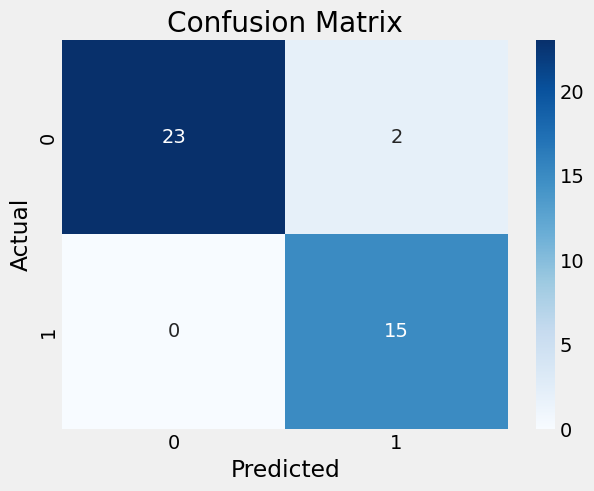

In [196]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
gdc = lgb.fit(x_train1,y_train1)

# Predictions:
y_pred12 = gdc.predict(x_test1)

# Performance:
print('Accuracy:', accuracy_score(y_test1,y_pred12))
print(confusion_matrix(y_test1,y_pred12))

x = accuracy_score(y_test1, y_pred12)
print(x)

print("\nClassification Report:")
print(classification_report(y_test1, y_pred12))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 160, number of negative: 133
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 293, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546075 -> initscore=0.184825
[LightGBM] [Info] Start training from score 0.184825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

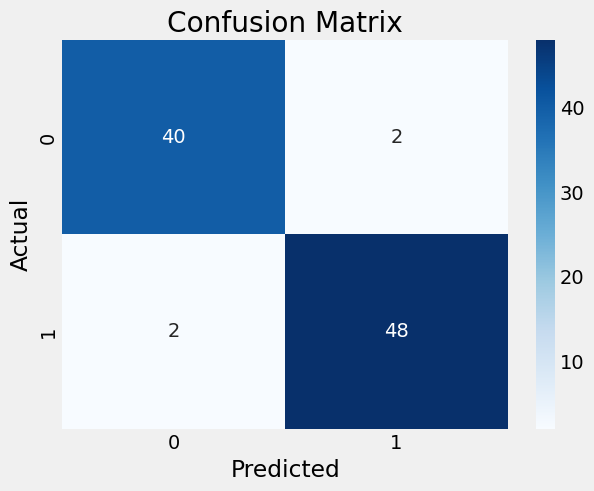

In [197]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score

# Define LightGBM classifier with specified parameters
lgbm = lgb.LGBMClassifier(learning_rate=0.01, 
                           n_estimators=1000)

# Perform cross-validation
cv_scores = cross_val_score(lgbm, x_train2, y_train2, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Predict with cross-validation
y_pred_cv = cross_val_predict(lgbm, x_test2, y_test2, cv=10)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test2, y_pred_cv)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_cv))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[LightGBM] [Info] Number of positive: 57, number of negative: 103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356250 -> initscore=-0.591678
[LightGBM] [Info] Start training from score -0.591678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

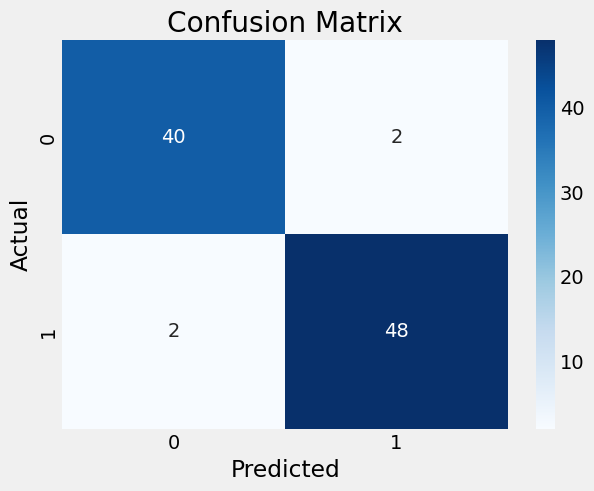

In [198]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
gdc = lgb.fit(x_train3,y_train3)

# Predictions:
y_pred13 = gdc.predict(x_test3)

# Performance:
print('Accuracy:', accuracy_score(y_test3,y_pred13))
print(confusion_matrix(y_test3,y_pred13))

x = accuracy_score(y_test3, y_pred13)
print(x)

print("\nClassification Report:")
print(classification_report(y_test3, y_pred13))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9782608695652174
[[41  1]
 [ 1 49]]
0.9782608695652174

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.98      0.98        50

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



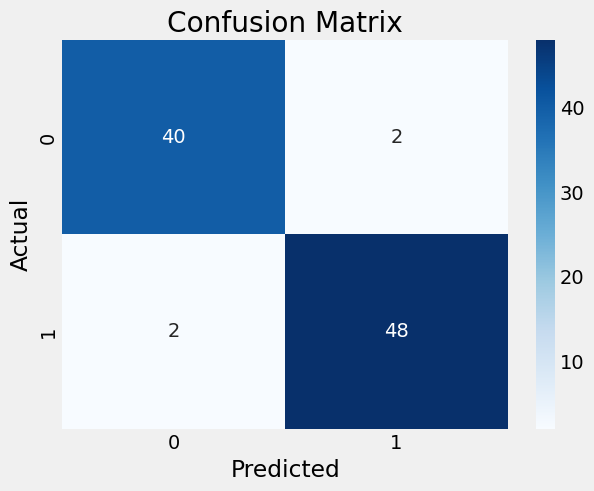

Cross-Validation Scores: [0.98648649 0.97297297 0.97260274 1.         0.95890411]
Mean CV Score: 0.9781932617549056


In [199]:
#for RFE with GBDT

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt.fit(x_train, y_train)
y_pred14 = gbdt.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_pred14))
print(confusion_matrix(y_test,y_pred14))

x = accuracy_score(y_test, y_pred14)
print(x)

print("\nClassification Report:")
print(classification_report(y_test, y_pred14))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#cross validation
cv_scores = cross_val_score(gbdt, x_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())




Accuracy: 0.9891304347826086
[[41  1]
 [ 0 50]]
0.9891304347826086

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.98      1.00      0.99        50

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



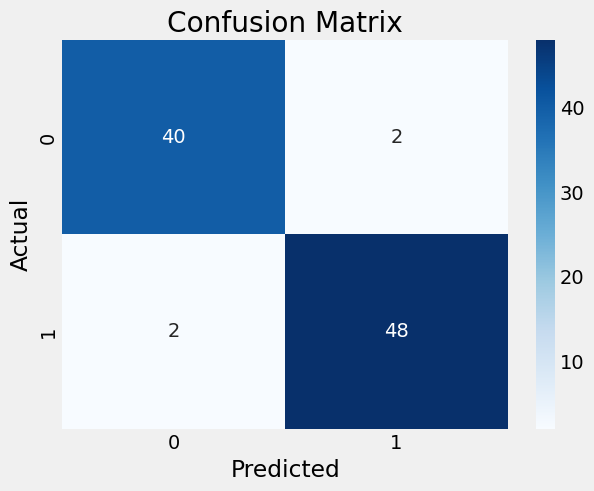

In [200]:
#for boruta with GBDT

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt.fit(x_train1, y_train1)
y_pred15 = gbdt.predict(x_test1)
print('Accuracy:', accuracy_score(y_test1,y_pred15))
print(confusion_matrix(y_test1,y_pred15))

x = accuracy_score(y_test1, y_pred15)
print(x)

print("\nClassification Report:")
print(classification_report(y_test1, y_pred15))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.967391304347826

Confusion Matrix:
[[41  1]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.98      0.96      0.97        50

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92



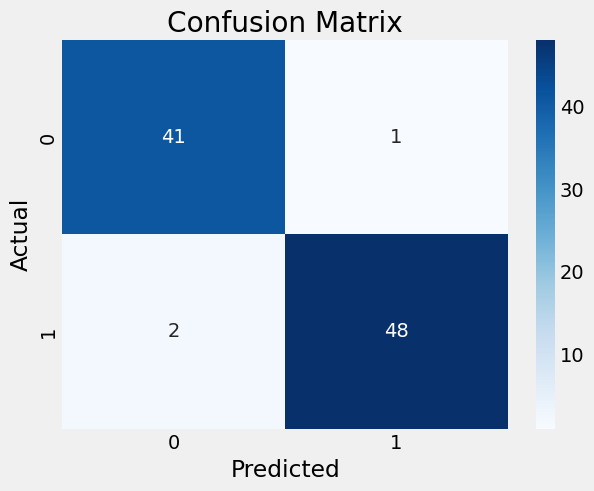

In [226]:
#for all_features with GBDT
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt.fit(x_train2, y_train2)
y_pred117 = gbdt.predict(x_test2)

cv_scores = cross_val_score(gbdt, x_train2, y_train2, cv=5)


# Predict with cross-validation
y_pred_cv117 = cross_val_predict(gbdt, x_test2, y_test2, cv=10)

x = accuracy_score(y_test2,y_pred_cv117)
print('Accuracy:', x)


# Compute confusion matrix
conf_matrix1 = confusion_matrix(y_test2, y_pred_cv117)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_cv117))

sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()





Accuracy: 0.95

Confusion Matrix:
[[24  1]
 [ 1 14]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        25
         1.0       0.93      0.93      0.93        15

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



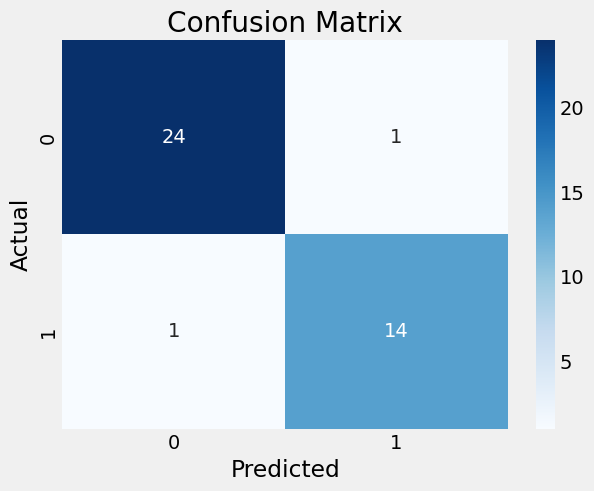

In [225]:
#for ckd2 with GBDT

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt.fit(x_train3, y_train3)
y_pred17 = gbdt.predict(x_test3)

cv_scores = cross_val_score(gbdt, x_train3, y_train3, cv=5)


# Predict with cross-validation
y_pred_cv17 = cross_val_predict(gbdt, x_test3, y_test3, cv=17)

x = accuracy_score(y_test3,y_pred_cv17)
print('Accuracy:', x)


# Compute confusion matrix
conf_matrix1 = confusion_matrix(y_test3, y_pred_cv17)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_cv17))

sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.9891304347826086
[[41  1]
 [ 0 50]]
0.9891304347826086

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.98      1.00      0.99        50

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



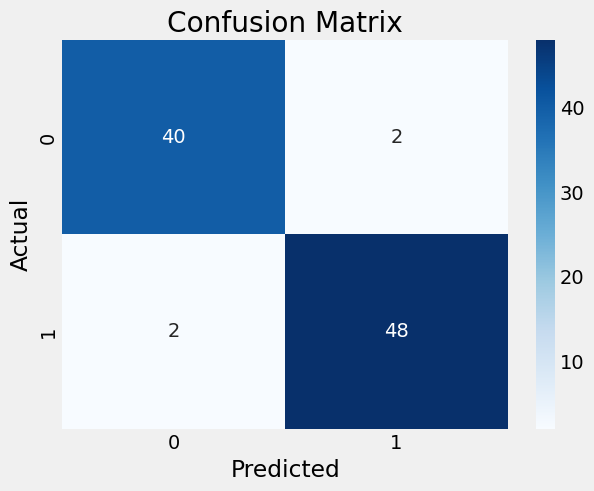

In [203]:
# voting with RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gbdt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
logistic_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()
#voting
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('gbdt', gbdt_model), 
    ('logistic', logistic_model), 
    ('knn', knn_model)], 
    voting='hard')

# Train the Voting Classifier
voting_clf.fit(x_train, y_train)
y_pred18 = voting_clf.predict(x_test)



print('Accuracy:', accuracy_score(y_test,y_pred18))
print(confusion_matrix(y_test,y_pred18))

x = accuracy_score(y_test, y_pred18)
print(x)

print("\nClassification Report:")
print(classification_report(y_test, y_pred18))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 1.0
[[42  0]
 [ 0 50]]
1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        50

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



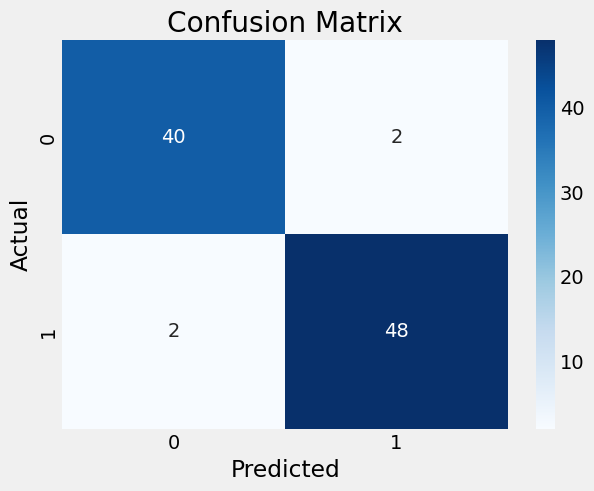

In [204]:
# voting with boruta
voting_clf.fit(x_train1, y_train1)
y_pred19 = voting_clf.predict(x_test1)



print('Accuracy:', accuracy_score(y_test1,y_pred19))
print(confusion_matrix(y_test1,y_pred19))

x = accuracy_score(y_test1, y_pred19)
print(x)

print("\nClassification Report:")
print(classification_report(y_test1, y_pred19))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.9782608695652174

Confusion Matrix:
[[42  0]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.96      0.98        50

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



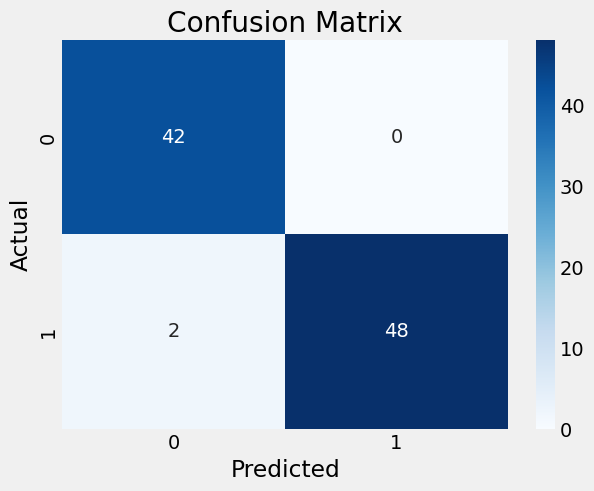

In [224]:



# voting for all_features
 

cv_scores = cross_val_score(voting_clf, x_train2, y_train2, cv=5)

# Predict with cross-validation
y_pred_cv20 = cross_val_predict(voting_clf, x_test2, y_test2, cv=10)

x = accuracy_score(y_test2,y_pred_cv20 )
print('Accuracy:', x)


# Compute confusion matrix
conf_matrix1 = confusion_matrix(y_test2, y_pred_cv20)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_cv20))

sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()





Accuracy: 0.975

Confusion Matrix:
[[25  0]
 [ 1 14]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        25
         1.0       1.00      0.93      0.97        15

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



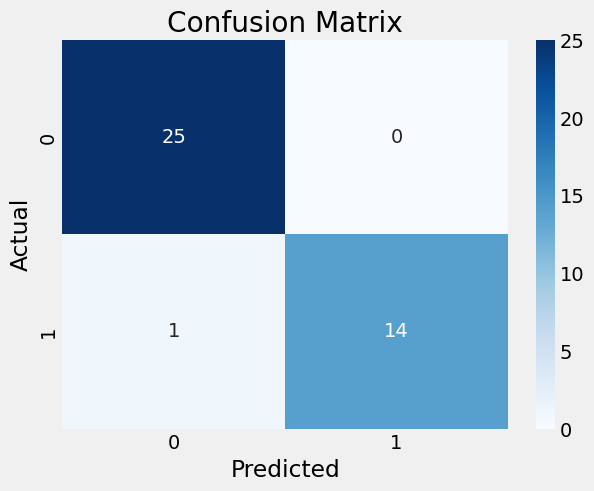

In [223]:
# voting for ckd2


cv_scores = cross_val_score(voting_clf, x_train3, y_train3, cv=5)

# Predict with cross-validation
y_pred_cv21 = cross_val_predict(voting_clf, x_test3, y_test3, cv=10)

x = accuracy_score(y_test3,y_pred_cv21 )
print('Accuracy:', x)


# Compute confusion matrix
conf_matrix1 = confusion_matrix(y_test3, y_pred_cv21)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_cv21))

sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()







Accuracy: 0.9891304347826086
[[41  1]
 [ 0 50]]
0.9891304347826086

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.98      1.00      0.99        50

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



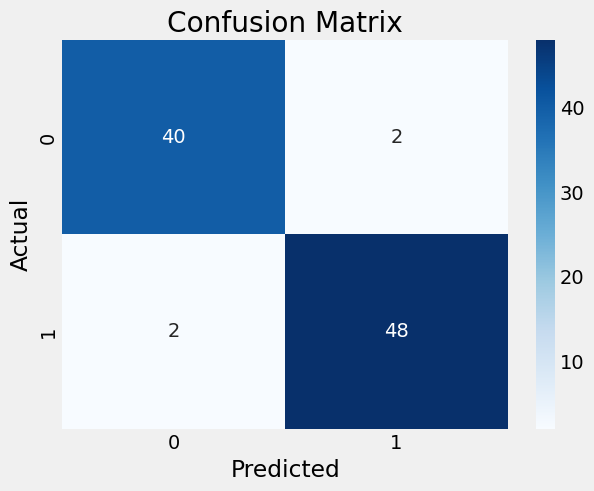

In [207]:
#stacking for RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

# Define the base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]
# Create the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(), cv=5)
stacking_clf.fit(x_train, y_train)

# Predict on the test set
y_pred22 = stacking_clf.predict(x_test)


print('Accuracy:', accuracy_score(y_test,y_pred22))
print(confusion_matrix(y_test,y_pred22))

x = accuracy_score(y_test, y_pred22)
print(x)

print("\nClassification Report:")
print(classification_report(y_test, y_pred22))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 1.0
[[42  0]
 [ 0 50]]
1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        50

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



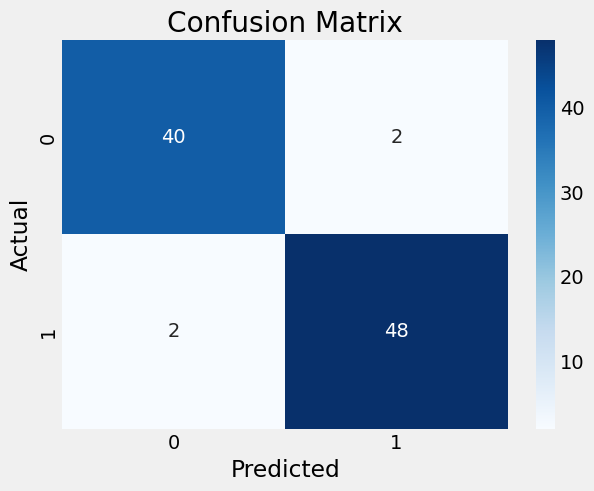

In [208]:
#stacking on boruta

stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(), cv=5)
stacking_clf.fit(x_train1, y_train1)

# Predict on the test set
y_pred23 = stacking_clf.predict(x_test1)


print('Accuracy:', accuracy_score(y_test1,y_pred23))
print(confusion_matrix(y_test1,y_pred23))

x = accuracy_score(y_test1, y_pred23)
print(x)

print("\nClassification Report:")
print(classification_report(y_test1, y_pred23))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.967391304347826

Confusion Matrix:
[[42  0]
 [ 3 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.94      0.97        50

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92



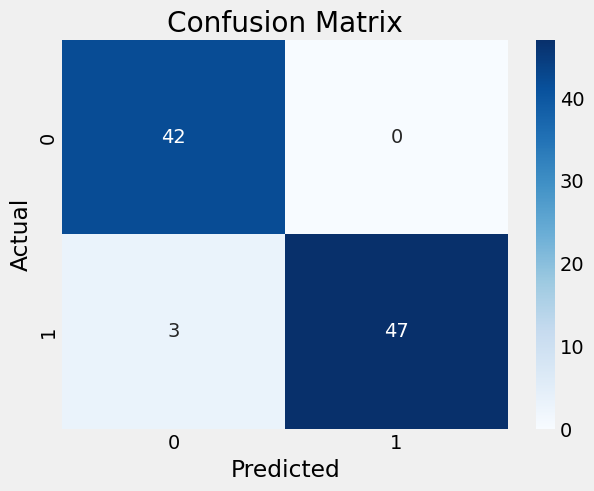

In [222]:
# stacking form all_features

cv_scores = cross_val_score(stacking_clf, x_train2, y_train2, cv=5)

# Predict with cross-validation
y_pred_cv24 = cross_val_predict(stacking_clf, x_test2, y_test2, cv=2)
x = accuracy_score(y_test2,y_pred_cv24 )
print('Accuracy:', x)

# Compute confusion matrix
conf_matrix1 = confusion_matrix(y_test2, y_pred_cv24)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_cv24))

sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.925

Confusion Matrix:
[[22  3]
 [ 0 15]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94        25
         1.0       0.83      1.00      0.91        15

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



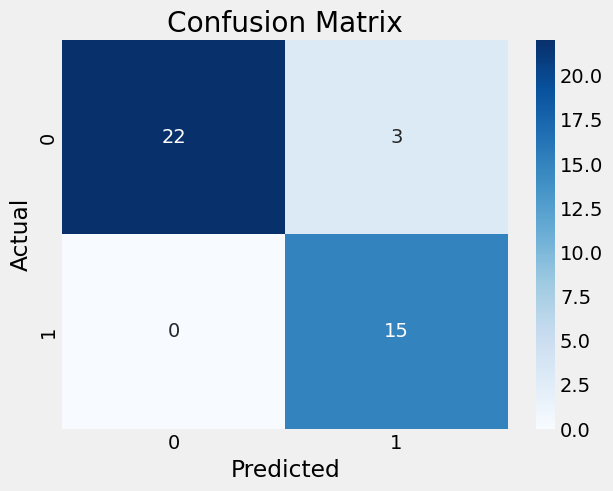

In [221]:
# stacking for ckd2


cv_scores = cross_val_score(stacking_clf, x_train3, y_train3, cv=5)


# Predict with cross-validation
y_pred_cv25 = cross_val_predict(stacking_clf, x_test3, y_test3, cv=2)

x = accuracy_score(y_test3,y_pred_cv25 )
print('Accuracy:', x)


# Compute confusion matrix
conf_matrix1 = confusion_matrix(y_test3, y_pred_cv25)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_cv25))

sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()